In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

%matplotlib inline

In [18]:
# 데이터셋 불러오기
tv = pd.read_csv('TV_RAW.csv')
vod = pd.read_csv('VOD_RAW.csv')
racoi = pd.read_csv('RACOI_RAW2.csv')
program = pd.read_csv('PROGRAM_RAW.csv')

In [19]:
# racoi_df 데이터 info 확인
racoi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RC_MONTH                   1292 non-null   object 
 1   RC_PROGRAM_NAME            1292 non-null   object 
 2   PROGRAM_CODE               1292 non-null   object 
 3   RC_PROGRAM_STR_DATE        1262 non-null   object 
 4   RC_CHNNEL_NM               1292 non-null   object 
 5   RC_PROGRAM_DAYS            1292 non-null   object 
 6   RC_BUZZ_VIWER_POST         1292 non-null   int64  
 7   RC_BUZZ_VIWER_COMMENT      1292 non-null   int64  
 8   RC_BUZZ_VIWER_VIDEO        1292 non-null   int64  
 9   RC_BUZZ_MEDIA_NEWS         1292 non-null   int64  
 10  RC_BUZZ_MEDIA_VIDEO        1292 non-null   int64  
 11  RC_LIVE_FAMILY_VIEWRS      1182 non-null   float64
 12  RC_LIVE_INDIVIDUAL_VIEWRS  1182 non-null   float64
 13  RC_LIVE_MALE_VIEWRS        1182 non-null   float

In [20]:
# tv_df 데이터 info 확인
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TV_No                       251 non-null    object 
 1   TV_MONTH                    251 non-null    object 
 2   PROGRAM_CODE                251 non-null    object 
 3   TV_PROGRAM_NAME             251 non-null    object 
 4   TV_PROGRAM_GENRE            251 non-null    object 
 5   TV_CHNNEL_NM                251 non-null    object 
 6   TV_ALL_WTCHNG_MIN           251 non-null    float64
 7   TV_ALL_WTCHNG_RT            251 non-null    float64
 8   TV_MALE_4_9YO_WTCHNG_MIN    251 non-null    float64
 9   TV_MALE_4_9YO_WTCHNG_RT     251 non-null    float64
 10  TV_FEMALE_4_9YO_WTCHNG_MIN  251 non-null    float64
 11  TV_FEMALE_4_9YO_WTCHNG_RT   251 non-null    float64
 12  TV_MALE_N10S_WTCHNG_MIN     251 non-null    float64
 13  TV_MALE_N10S_WTCHNG_RT      251 non

In [21]:
# vod_df 데이터 info 확인
vod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VOD_NO                       534 non-null    object 
 1   VOD_MONTH                    534 non-null    object 
 2   VOD_PROGRAM_NAME             534 non-null    object 
 3   PROGRAM_CODE                 534 non-null    object 
 4   VOD_PROGRAM_GENRE            534 non-null    object 
 5   VOD_CHNNEL_NM                534 non-null    object 
 6   VOD_FAMILY_WTCHNG_MIN        534 non-null    float64
 7   VOD_FAMILY_WTCHNG_RT         534 non-null    float64
 8   VOD_INDIVIDUAL_WTCHNG_MIN    534 non-null    float64
 9   VOD_INDIVIDUAL_WTCHNG_RT     534 non-null    float64
 10  VOD_MALE_WTCHNG_MIN          534 non-null    float64
 11  VOD_MALE_WTCHNG_RT           534 non-null    float64
 12  VOD_FEMALE_WTCHNG_MIN        534 non-null    float64
 13  VOD_FEMALE_WTCHNG_RT

In [22]:
# program_df 데이터 info 확인
program.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PROGRAM_CODE         363 non-null    object
 1   RC_PROGRAM_NAME      363 non-null    object
 2   RC_PROGRAM_STR_DATE  363 non-null    object
 3   RC_CHNNEL_NM         363 non-null    object
 4   RC_PROGRAM_DAYS      363 non-null    object
 5   TV                   363 non-null    object
 6   VOD                  363 non-null    object
dtypes: object(7)
memory usage: 70.8+ KB


In [23]:
# racoi_df 데이터 확인
racoi.head(10)

,RC_MONTH,RC_PROGRAM_NAME,PROGRAM_CODE,RC_PROGRAM_STR_DATE,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,RC_LIVE_INDIVIDUAL_VIEWRS,RC_LIVE_MALE_VIEWRS,RC_LIVE_FEMALE_VIEWRS,RC_LIVE_10S_VIEWRS,RC_LIVE_20S_VIEWRS,RC_LIVE_30S_VIEWRS,RC_LIVE_40S_VIEWRS,RC_LIVE_50S_VIEWRS
0,2021_05,휴먼다큐사노라면,CODE_0001,2012.03.07,MBN,금,23,28,13,8,90,447.0,598.0,261.0,337.0,17.0,12.0,47.0,49.0,118.0
1,2021_06,휴먼다큐사노라면,CODE_0001,2012.03.07,MBN,금,20,2,1,0,88,455.0,612.0,268.0,343.0,24.0,13.0,64.0,50.0,88.0
2,2021_07,휴먼다큐사노라면,CODE_0001,2012.03.07,MBN,금,31,49,2,5,108,486.0,627.0,264.0,364.0,18.0,25.0,51.0,60.0,122.0
3,2021_08,휴먼다큐사노라면,CODE_0001,2012.03.07,MBN,금,10,8,4,2,89,493.0,665.0,294.0,371.0,28.0,29.0,66.0,68.0,136.0
4,2021_09,휴먼다큐사노라면,CODE_0001,2012.03.07,MBN,금,11,4,2,0,86,474.0,667.0,312.0,355.0,24.0,36.0,58.0,53.0,150.0
5,2021_10,휴먼다큐사노라면,CODE_0001,2012.03.07,MBN,금,19,20,2,0,108,394.0,579.0,266.0,312.0,24.0,20.0,55.0,54.0,109.0
6,2021_05,환경스페셜,CODE_0002,2021.03.04,KBS2,목,56,186,42,39,36,627.0,938.0,406.0,532.0,37.0,47.0,99.0,151.0,222.0
7,2021_06,환경스페셜,CODE_0002,2021.03.04,KBS2,목,77,437,93,32,48,591.0,796.0,344.0,452.0,20.0,56.0,72.0,93.0,227.0
8,2021_07,환경스페셜,CODE_0002,2021.03.04,KBS2,목,220,1235,233,42,29,742.0,1062.0,440.0,622.0,33.0,50.0,98.0,130.0,293.0
9,2021_08,환경스페셜,CODE_0002,2021.03.04,KBS2,목,156,747,304,20,35,524.0,768.0,334.0,435.0,33.0,43.0,78.0,109.0,192.0


In [26]:
#racoi 행,열 확인
print(racoi.columns)
print("------------------------------------------------------------------")
print(racoi.index)

Index(['RC_MONTH', 'RC_PROGRAM_NAME', 'PROGRAM_CODE', 'RC_PROGRAM_STR_DATE',
       'RC_CHNNEL_NM', 'RC_PROGRAM_DAYS', 'RC_BUZZ_VIWER_POST',
       'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO', 'RC_BUZZ_MEDIA_NEWS',
       'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       'RC_LIVE_INDIVIDUAL_VIEWRS', 'RC_LIVE_MALE_VIEWRS',
       'RC_LIVE_FEMALE_VIEWRS', 'RC_LIVE_10S_VIEWRS', 'RC_LIVE_20S_VIEWRS',
       'RC_LIVE_30S_VIEWRS', 'RC_LIVE_40S_VIEWRS', 'RC_LIVE_50S_VIEWRS'],
      dtype='object')
------------------------------------------------------------------
RangeIndex(start=0, stop=1292, step=1)


In [29]:
### descirbe() 기초 통계량 확인
display(racoi.describe())

,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,RC_LIVE_INDIVIDUAL_VIEWRS,RC_LIVE_MALE_VIEWRS,RC_LIVE_FEMALE_VIEWRS,RC_LIVE_10S_VIEWRS,RC_LIVE_20S_VIEWRS,RC_LIVE_30S_VIEWRS,RC_LIVE_40S_VIEWRS,RC_LIVE_50S_VIEWRS
count,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1182.000000,1182.000000,1182.000000,1182.000000,1162.000000,1174.000000,1180.000000,1180.000000,1182.000000
mean,856.359907,8937.934985,1518.216718,647.986068,114.931115,613.459391,906.359560,399.006768,507.374788,44.236661,58.525554,92.068644,161.933051,210.373942
std,2002.302730,32058.606157,4078.082118,830.091472,107.698739,664.027294,978.617441,424.139354,557.186863,54.356481,68.427875,98.021857,183.291260,235.938048
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.000000,269.000000,34.750000,47.000000,30.000000,177.250000,260.000000,109.000000,148.000000,8.000000,14.000000,25.000000,37.000000,56.000000
50%,236.000000,1099.500000,209.500000,310.000000,91.000000,425.500000,614.500000,268.500000,348.500000,26.500000,38.000000,63.000000,103.000000,144.000000
75%,821.500000,6017.250000,1183.500000,935.750000,170.000000,868.750000,1283.750000,578.000000,697.750000,57.000000,76.000000,127.000000,217.000000,287.750000
max,31057.000000,648010.000000,66581.000000,6702.000000,678.000000,5222.000000,7623.000000,3244.000000,4378.000000,425.000000,522.000000,630.000000,1202.000000,1778.000000


In [42]:
# qunique() 함수로 범주형 피처의 개수 출력
print("RC_MONTH : ", len(racoi['RC_MONTH'].unique()))
print("RC_PROGRAM_NAME : ", len(racoi['RC_PROGRAM_NAME'].unique()))  
print("PROGRAM_CODE : ", len(racoi['PROGRAM_CODE'].unique()))  
print("RC_CHNNEL_NM : ", len(racoi['RC_CHNNEL_NM'].unique()))
print("RC_PROGRAM_DAYS : ", len(racoi['RC_PROGRAM_DAYS'].unique()))

RC_MONTH :  6
RC_PROGRAM_NAME :  363
PROGRAM_CODE :  363
RC_CHNNEL_NM :  25
RC_PROGRAM_DAYS :  18


In [44]:
# Data가 가장 많은 방송사별 Top 10 출력
rc_chnnel_nm_count = racoi['RC_CHNNEL_NM'].value_counts() [:10]
for idx, (val, cnt) in enumerate(rc_chnnel_nm_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : KBS2 150
Top 2 : tvN 148
Top 3 : SBS 131
Top 4 : MBC 129
Top 5 : KBS1 107
Top 6 : MBN 106
Top 7 : JTBC 95
Top 8 : 채널A 83
Top 9 : EBS1 71
Top 10 : TV CHOS 62


In [256]:
###### racoi데이터 groub_by 프로그램명 평균값  
racoi_groupby_pname_mean = racoi.groupby(
    ['PROGRAM_CODE','RC_PROGRAM_NAME','RC_CHNNEL_NM','RC_PROGRAM_DAYS'], 
    as_index=False).mean().sort_values(by=["RC_BUZZ_VIWER_POST"], ascending = [False])
display(racoi_groupby_pname_mean)

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,RC_LIVE_INDIVIDUAL_VIEWRS,RC_LIVE_MALE_VIEWRS,RC_LIVE_FEMALE_VIEWRS,RC_LIVE_10S_VIEWRS,RC_LIVE_20S_VIEWRS,RC_LIVE_30S_VIEWRS,RC_LIVE_40S_VIEWRS,RC_LIVE_50S_VIEWRS
137,CODE_0138,스트릿우먼파이터,Mnet,화,22175.333333,265441.333333,41326.000000,3981.000000,441.000000,367.000000,601.333333,242.000000,359.666667,41.000000,100.333333,137.666667,126.333333,99.333333
296,CODE_0297,갯마을차차차,tvN,토일,11486.333333,80168.000000,13308.333333,2396.333333,347.333333,1579.000000,2766.666667,1191.000000,1575.333333,207.666667,240.666667,328.666667,652.333333,800.000000
143,CODE_0144,쇼미더머니10,Mnet,금,9453.500000,78347.000000,13948.500000,1059.000000,227.000000,223.000000,416.000000,208.000000,208.000000,49.000000,66.000000,60.000000,124.000000,79.000000
27,CODE_0028,펜트하우스3,SBS,금,9340.800000,84294.800000,22316.600000,3014.600000,156.200000,3188.250000,5251.250000,2173.750000,3077.750000,367.250000,461.250000,605.250000,1007.250000,1480.250000
133,CODE_0134,슬기로운의사생활2,tvN,수목,8414.800000,57241.200000,11166.400000,2677.200000,160.000000,2217.250000,4036.750000,1653.500000,2383.250000,325.500000,390.500000,558.250000,1146.000000,988.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,CODE_0010,해피뷰티데이,KBS joy,일,2.000000,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,CODE_0261,나랏녹,MBC,토,2.000000,2.000000,0.000000,0.000000,0.000000,107.000000,160.000000,77.000000,83.000000,0.000000,14.000000,5.000000,24.000000,67.000000
324,CODE_0324,탐나는TV,MBC,금,1.833333,12.666667,1.333333,0.000000,21.500000,87.833333,109.833333,50.333333,60.000000,3.000000,4.500000,9.500000,18.000000,23.166667
292,CODE_0293,결혼은미친짓이야,iHQ,목,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
import pprint

In [257]:
print(racoi_groupby_pname_mean.columns)

Index(['PROGRAM_CODE', 'RC_PROGRAM_NAME', 'RC_CHNNEL_NM', 'RC_PROGRAM_DAYS',
       'RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO',
       'RC_BUZZ_MEDIA_NEWS', 'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       'RC_LIVE_INDIVIDUAL_VIEWRS', 'RC_LIVE_MALE_VIEWRS',
       'RC_LIVE_FEMALE_VIEWRS', 'RC_LIVE_10S_VIEWRS', 'RC_LIVE_20S_VIEWRS',
       'RC_LIVE_30S_VIEWRS', 'RC_LIVE_40S_VIEWRS', 'RC_LIVE_50S_VIEWRS'],
      dtype='object')


In [258]:
cols = ['RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO','RC_BUZZ_MEDIA_NEWS', 'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       'RC_LIVE_INDIVIDUAL_VIEWRS', 'RC_LIVE_MALE_VIEWRS',
       'RC_LIVE_FEMALE_VIEWRS', 'RC_LIVE_10S_VIEWRS', 'RC_LIVE_20S_VIEWRS',
       'RC_LIVE_30S_VIEWRS', 'RC_LIVE_40S_VIEWRS', 'RC_LIVE_50S_VIEWRS' ]
corr = racoi_groupby_pname_mean[cols].corr(method = 'pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

display(corr)

,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,RC_LIVE_INDIVIDUAL_VIEWRS,RC_LIVE_MALE_VIEWRS,RC_LIVE_FEMALE_VIEWRS,RC_LIVE_10S_VIEWRS,RC_LIVE_20S_VIEWRS,RC_LIVE_30S_VIEWRS,RC_LIVE_40S_VIEWRS,RC_LIVE_50S_VIEWRS
RC_BUZZ_VIWER_POST,1.000000,0.633264,0.877860,0.673106,0.511403,0.326046,0.387233,0.380678,0.390618,0.530391,0.536942,0.510992,0.504655,0.423811
RC_BUZZ_VIWER_COMMENT,0.633264,1.000000,0.759467,0.396184,0.368948,0.147142,0.175704,0.162201,0.185292,0.231522,0.302824,0.239473,0.182933,0.194259
RC_BUZZ_VIWER_VIDEO,0.877860,0.759467,1.000000,0.649855,0.574069,0.315062,0.368326,0.355047,0.376919,0.496727,0.509226,0.482300,0.451588,0.397097
RC_BUZZ_MEDIA_NEWS,0.673106,0.396184,0.649855,1.000000,0.644818,0.448853,0.500318,0.490118,0.505998,0.544519,0.594092,0.569855,0.579167,0.557764
RC_BUZZ_MEDIA_VIDEO,0.511403,0.368948,0.574069,0.644818,1.000000,0.361889,0.383889,0.372417,0.390989,0.384657,0.403828,0.422493,0.398171,0.389813
RC_LIVE_FAMILY_VIEWRS,0.326046,0.147142,0.315062,0.448853,0.361889,1.000000,0.989817,0.985276,0.989111,0.804157,0.867712,0.864108,0.799848,0.953608
RC_LIVE_INDIVIDUAL_VIEWRS,0.387233,0.175704,0.368326,0.500318,0.383889,0.989817,1.000000,0.996868,0.998178,0.870644,0.923813,0.917276,0.870540,0.978187
RC_LIVE_MALE_VIEWRS,0.380678,0.162201,0.355047,0.490118,0.372417,0.985276,0.996868,1.000000,0.990280,0.872432,0.919540,0.916598,0.875822,0.976835
RC_LIVE_FEMALE_VIEWRS,0.390618,0.185292,0.376919,0.505998,0.390989,0.989111,0.998178,0.990280,1.000000,0.865585,0.923157,0.913939,0.862833,0.975096
RC_LIVE_10S_VIEWRS,0.530391,0.231522,0.496727,0.544519,0.384657,0.804157,0.870644,0.872432,0.865585,1.000000,0.932851,0.944612,0.958381,0.866976


In [259]:
import re

In [260]:
cols_view = ['VIWER_POST', 'VIWER_COMMENT', 'VIWER_VIDEO','MEDIA_NEWS', 'MEDIA_VIDEO', 'FAMILY_VIEWRS',
       'INDIVIDUAL_VIEWRS', 'MALE_VIEWRS',
       'FEMALE_VIEWRS', '10S_VIEWRS', '20S_VIEWRS',
       '30S_VIEWRS', 'R40S_VIEWRS', '50S_VIEWRS' ]

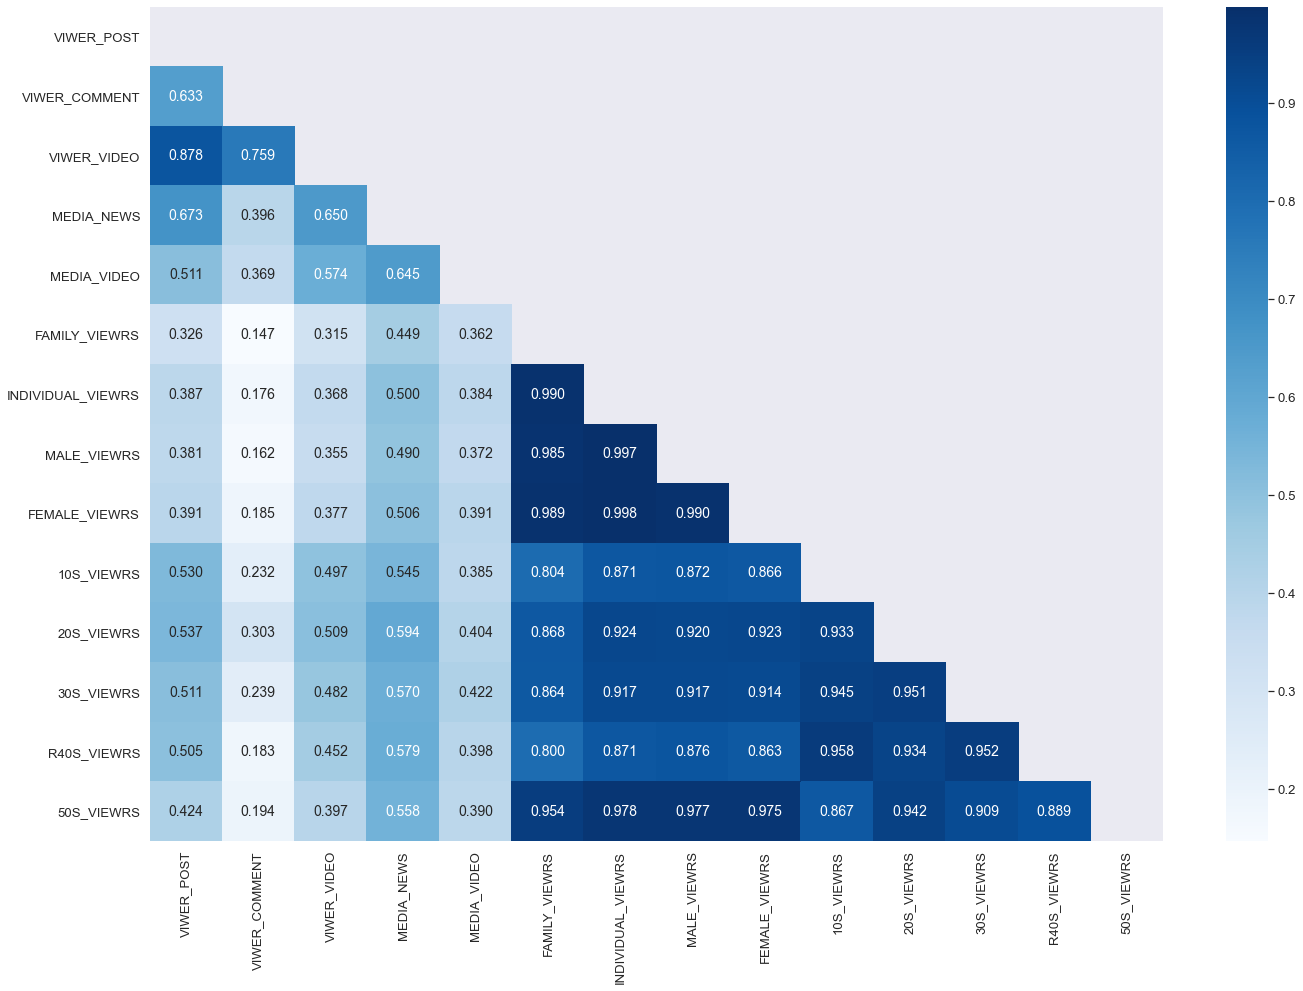

In [261]:
sns.set(rc = {'figure.figsize':(20,14)}, font_scale = 1.2)
hm = sns.heatmap(corr.values, cmap = "Blues", cbar = True, annot = True, xticklabels = cols_view, 
                 yticklabels = cols_view, fmt = '.3f', annot_kws = {'size':14}, mask = mask)                
plt.tight_layout()
plt.show()


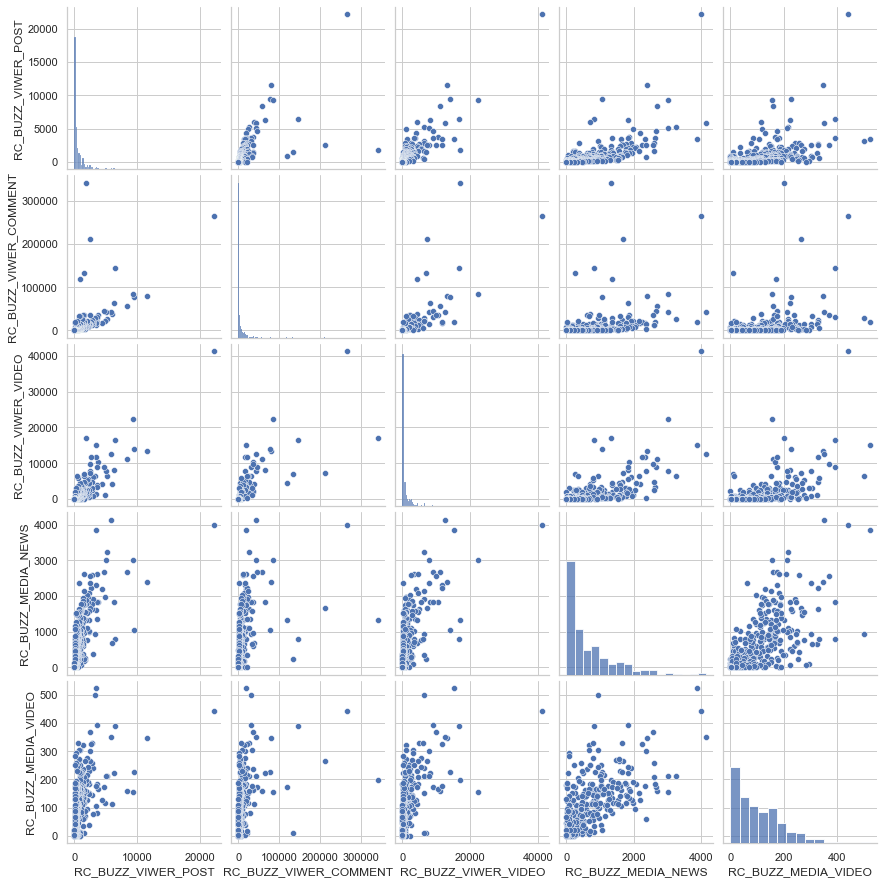

In [130]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(racoi_groubby_pname_mean[['RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO', 'RC_BUZZ_MEDIA_NEWS','RC_BUZZ_MEDIA_VIDEO']], height = 2.5)
plt.show()

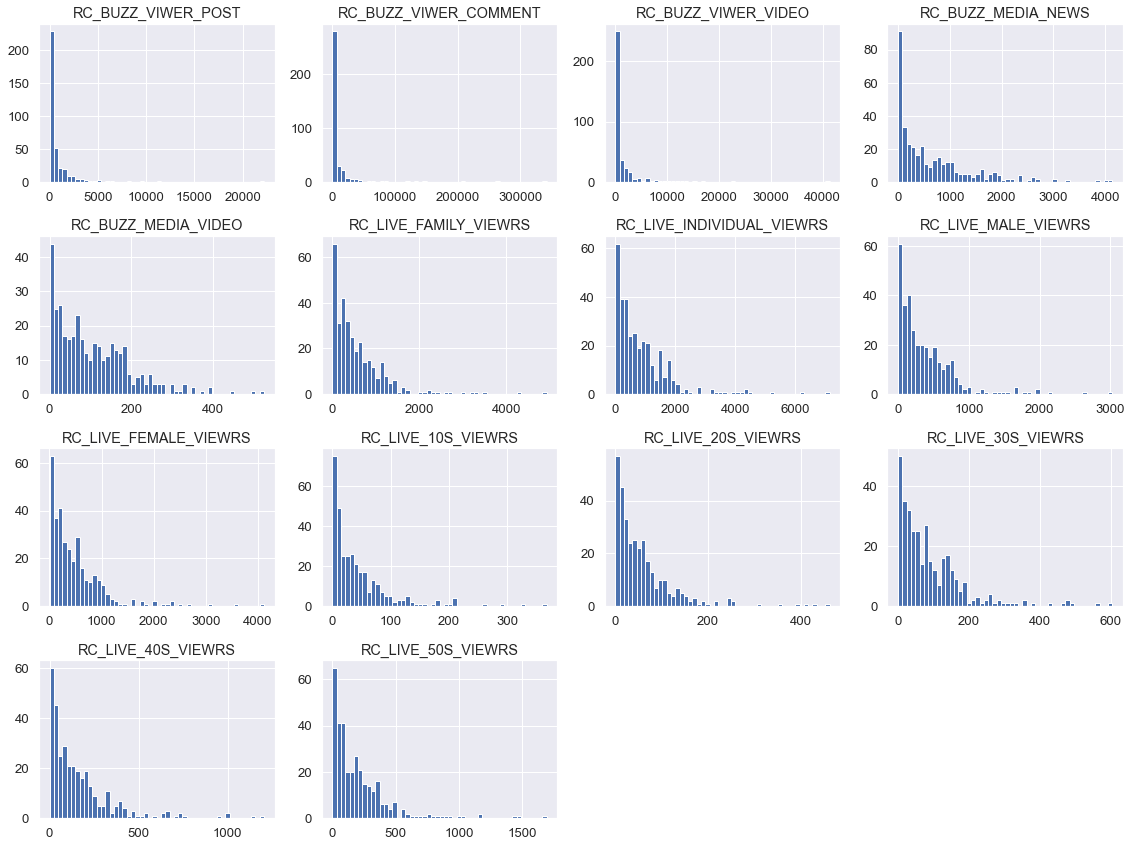

In [347]:
racoi_groupby_pname_mean.hist(figsize = (16, 12), bins = 50)
plt.tight_layout()
plt.show()

In [120]:
racoi.groupby('RC_PROGRAM_NAME').get_group('스트릿우먼파이터')

,RC_MONTH,RC_PROGRAM_NAME,PROGRAM_CODE,RC_PROGRAM_STR_DATE,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,RC_LIVE_INDIVIDUAL_VIEWRS,RC_LIVE_MALE_VIEWRS,RC_LIVE_FEMALE_VIEWRS,RC_LIVE_10S_VIEWRS,RC_LIVE_20S_VIEWRS,RC_LIVE_30S_VIEWRS,RC_LIVE_40S_VIEWRS,RC_LIVE_50S_VIEWRS
464,2021_08,스트릿우먼파이터,CODE_0138,2021.08.24,Mnet,화,7644,69742,8005,1226,191,233.0,421.0,186.0,236.0,27.0,61.0,88.0,98.0,83.0
465,2021_09,스트릿우먼파이터,CODE_0138,2021.08.24,Mnet,화,31057,355162,49392,4015,468,397.0,614.0,244.0,370.0,42.0,109.0,139.0,92.0,113.0
466,2021_10,스트릿우먼파이터,CODE_0138,2021.08.24,Mnet,화,27825,371420,66581,6702,664,471.0,769.0,296.0,473.0,54.0,131.0,186.0,189.0,102.0


In [269]:
# vod groupby
vod_groupby_name = vod.groupby(['VOD_PROGRAM_NAME', 'PROGRAM_CODE', 'VOD_PROGRAM_GENRE'],as_index=False).mean().sort_values(by=["VOD_FAMILY_WTCHNG_RT"], ascending = [False] )
display(vod_groupby_name[0:10])

,VOD_PROGRAM_NAME,PROGRAM_CODE,VOD_PROGRAM_GENRE,VOD_FAMILY_WTCHNG_MIN,VOD_FAMILY_WTCHNG_RT,VOD_INDIVIDUAL_WTCHNG_MIN,VOD_INDIVIDUAL_WTCHNG_RT,VOD_MALE_WTCHNG_MIN,VOD_MALE_WTCHNG_RT,VOD_FEMALE_WTCHNG_MIN,...,VOD_FEMALE_N40S_WTCHNG_MIN,VOD_FEMALE_N40S_WTCHNG_RT,VOD_MALE_N50S_WTCHNG_MIN,VOD_MALE_N50S_WTCHNG_RT,VOD_FEMALE_N50S_WTCHNG_MIN,VOD_FEMALE_N50S_WTCHNG_RT,VOD_MALE_N60S_WTCHNG_MIN,VOD_MALE_N60S_WTCHNG_RT,VOD_FEMALE_N60S_WTCHNG_MIN,VOD_FEMALE_N60S_WTCHNG_RT
112,슬기로운의사생활시즌2(본),CODE_0134,드라마&영화,2.267500,0.743000,1.848750,0.60275,1.772250,0.564500,1.926250,...,4.371250,1.351000,1.907000,0.583500,1.339000,0.481750,0.565750,0.169250,0.605000,0.1965
10,갯마을차차차(본),CODE_0297,드라마&영화,3.128667,0.704333,2.778333,0.61300,2.061000,0.450667,3.503667,...,7.822667,1.738333,4.436333,1.054667,3.917667,0.925667,0.511333,0.120333,1.461667,0.3250
87,빈센조(본),CODE_0164,드라마&영화,0.950000,0.536000,0.772000,0.43500,0.662000,0.373000,0.883000,...,2.129000,1.201000,0.579000,0.327000,1.080000,0.609000,0.187000,0.105000,0.146000,0.0820
152,월화드라마<연모>,CODE_0094,드라마&영화,2.178000,0.522000,1.911000,0.45800,1.739000,0.417000,2.085000,...,3.544000,0.850000,5.636000,1.352000,4.601000,1.104000,1.190000,0.285000,1.537000,0.3690
62,로스쿨(본),CODE_0212,드라마&영화,1.620000,0.500500,1.203500,0.37300,0.853000,0.261000,1.558000,...,2.989500,0.894500,1.198500,0.372500,2.155500,0.715500,0.128000,0.041500,0.050500,0.0210
27,금토드라마<검은태양>,CODE_0294,드라마&영화,2.112000,0.470000,1.923000,0.43500,1.717500,0.370500,2.131500,...,3.939000,0.962500,3.959500,0.875000,3.501000,0.790000,0.619000,0.110500,0.888000,0.2080
28,금토드라마<모범택시>,CODE_0198,드라마&영화,2.506000,0.432000,2.138000,0.36900,1.999000,0.345000,2.279000,...,4.509000,0.778000,2.329000,0.402000,1.024000,0.177000,0.756000,0.130000,0.792000,0.1370
64,마인(본),CODE_0206,드라마&영화,2.413500,0.425000,2.005000,0.35350,1.615500,0.285000,2.399000,...,2.997000,0.527000,1.334000,0.234500,2.374500,0.418000,1.185500,0.209000,1.108000,0.1950
154,월화드라마<홍천기>,CODE_0004,드라마&영화,1.416000,0.408000,1.000333,0.29600,0.938333,0.288667,1.063333,...,0.996667,0.344333,2.710333,0.772667,2.873667,0.780333,0.811333,0.184333,0.705333,0.1590
31,꼬리에꼬리를무는그날이야기,CODE_0267,정보,0.658000,0.382000,0.660000,0.38400,0.699000,0.407000,0.620000,...,0.326000,0.190000,0.986000,0.573000,0.510000,0.296000,0.616000,0.358000,0.405000,0.2350


In [310]:
tv_groupby_name.shape

(93, 33)

In [307]:
# tv groupby
tv_groupby_name = tv.groupby(['TV_PROGRAM_NAME', 'PROGRAM_CODE','TV_PROGRAM_GENRE'],as_index=False).mean().sort_values(by=["TV_ALL_WTCHNG_RT"], ascending = [False] )
display(tv_groupby_name[0:10])

,TV_PROGRAM_NAME,PROGRAM_CODE,TV_PROGRAM_GENRE,TV_ALL_WTCHNG_MIN,TV_ALL_WTCHNG_RT,TV_MALE_4_9YO_WTCHNG_MIN,TV_MALE_4_9YO_WTCHNG_RT,TV_FEMALE_4_9YO_WTCHNG_MIN,TV_FEMALE_4_9YO_WTCHNG_RT,TV_MALE_N10S_WTCHNG_MIN,TV_MALE_N10S_WTCHNG_RT,TV_FEMALE_N10S_WTCHNG_MIN,TV_FEMALE_N10S_WTCHNG_RT,TV_MALE_N20S_WTCHNG_MIN,TV_MALE_N20S_WTCHNG_RT,TV_FEMALE_N20S_WTCHNG_MIN,TV_FEMALE_N20S_WTCHNG_RT,TV_MALE_N30S_WTCHNG_MIN,TV_MALE_N30S_WTCHNG_RT,TV_FEMALE_N30S_WTCHNG_MIN,TV_FEMALE_N30S_WTCHNG_RT,TV_MALE_N40S_WTCHNG_MIN,TV_MALE_N40S_WTCHNG_RT,TV_FEMALE_N40S_WTCHNG_MIN,TV_FEMALE_N40S_WTCHNG_RT,TV_MALE_N50S_WTCHNG_MIN,TV_MALE_N50S_WTCHNG_RT,TV_FEMALE_N50S_WTCHNG_MIN,TV_FEMALE_N50S_WTCHNG_RT,TV_MALE_N60S_WTCHNG_MIN,TV_MALE_N60S_WTCHNG_RT,TV_FEMALE_N60S_WTCHNG_MIN,TV_FEMALE_N60S_WTCHNG_RT
85,주말드라마<오케이광자매>,CODE_0085,드라마&영화,72.290600,13.43440,24.605400,4.66460,43.92000,8.14560,23.658800,4.31920,30.26880,5.68800,31.269000,5.82200,34.50360,6.38840,24.894800,4.718000,37.971200,7.147000,37.94120,7.09400,57.041000,10.603600,84.26680,15.628600,119.522200,22.27220,124.503800,23.061400,148.773800,27.567600
84,주말드라마<신사와아가씨>,CODE_0125,드라마&영화,53.891000,12.17650,21.896500,4.98050,28.58950,6.66500,20.035500,4.56500,21.43550,4.24500,18.065500,4.31300,24.27150,4.96900,18.924500,4.655000,32.979500,7.352500,26.81800,5.92550,38.902500,8.960000,60.50200,13.722000,89.687000,20.65850,94.494000,21.348500,114.223500,25.615500
11,금요드라마<펜트하우스3>,CODE_0028,드라마&영화,27.041250,9.78000,14.853250,5.63875,23.93025,9.06200,17.676500,6.18300,25.55900,9.27350,15.774250,5.69975,23.14100,8.37100,16.097500,5.839750,22.826000,8.213500,24.50275,8.75150,37.600500,13.341500,37.63225,13.633750,51.092750,18.60725,23.978000,8.693750,25.884500,9.415750
77,일일드라마<미스몬테크리스토>,CODE_0189,드라마&영화,66.769500,8.73250,20.364000,2.66350,43.67400,5.71100,34.716500,4.53500,19.18700,2.50500,19.178000,2.50850,26.33950,3.44900,29.633000,3.874500,43.288000,5.662500,29.83650,3.90650,48.787000,6.377000,53.93800,7.057500,92.537000,12.09850,127.021000,16.611500,157.368000,20.585500
79,일일드라마<빨강구두>,CODE_0162,드라마&영화,52.754250,8.14225,20.228250,3.07200,23.31175,3.67300,20.055500,3.13075,16.66525,2.53775,14.563250,2.25125,16.40725,2.50625,23.902000,3.652500,32.810250,5.094250,23.82925,3.71500,28.632500,4.452500,38.77025,5.999000,78.788000,12.14375,101.534000,15.674500,134.006250,20.648750
42,빈센조(본),CODE_0164,드라마&영화,14.193000,7.97300,10.096000,5.67200,4.95400,2.78300,9.014000,5.06400,9.77600,5.49200,8.745000,4.91300,14.16900,7.96000,9.801000,5.506000,15.495000,8.705000,19.43700,10.92000,25.337000,14.234000,18.31500,10.289000,22.730000,12.77000,10.576000,5.942000,10.001000,5.618000
13,금토드라마<모범택시>,CODE_0198,드라마&영화,46.325000,7.96000,25.931000,4.45500,30.58900,5.25600,27.243000,4.68100,25.74700,4.42400,28.971000,4.97800,25.96300,4.46100,31.837000,5.470000,44.170000,7.589000,64.95800,11.16100,68.308000,11.737000,75.94000,13.048000,73.098000,12.56000,40.321000,6.928000,39.784000,6.836000
80,일일드라마<속아도꿈결>,CODE_0148,드라마&영화,39.208600,7.38740,11.944000,2.21060,16.02340,3.00980,21.127200,3.93060,9.04420,1.70380,8.917000,1.67200,12.12280,2.25020,13.741200,2.580400,17.522200,3.286000,14.14660,2.68860,16.709200,3.141800,28.51500,5.405800,55.362200,10.42360,88.125800,16.643800,102.403800,19.293000
55,슬기로운의사생활시즌2(본),CODE_0134,드라마&영화,22.851250,7.37400,17.121500,5.58025,20.04700,6.36825,16.533250,5.42325,21.18175,6.73200,13.411500,4.31100,22.83775,7.42925,15.757750,5.088750,28.138500,9.176750,28.56000,9.22225,51.945750,16.670500,31.52525,10.182000,34.415000,11.08850,10.000750,3.264500,11.126500,3.558000
34,미운우리새끼,CODE_0188,오락,31.227833,7.17300,12.513833,2.85550,16.13600,3.65700,18.712667,4.26350,17.93100,4.11750,12.667833,2.89200,18.25500,4.18200,17.771667,4.146333,24.400833,5.597333,41.46850,9.56800,41.431333,9.662833,40.95200,9.399833,48.623833,11.18500,32.558833,7.425833,42.653333,9.732833


<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 85 to 48
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TV_PROGRAM_NAME             93 non-null     object 
 1   PROGRAM_CODE                93 non-null     object 
 2   TV_PROGRAM_GENRE            93 non-null     object 
 3   TV_ALL_WTCHNG_MIN           93 non-null     float64
 4   TV_ALL_WTCHNG_RT            93 non-null     float64
 5   TV_MALE_4_9YO_WTCHNG_MIN    93 non-null     float64
 6   TV_MALE_4_9YO_WTCHNG_RT     93 non-null     float64
 7   TV_FEMALE_4_9YO_WTCHNG_MIN  93 non-null     float64
 8   TV_FEMALE_4_9YO_WTCHNG_RT   93 non-null     float64
 9   TV_MALE_N10S_WTCHNG_MIN     93 non-null     float64
 10  TV_MALE_N10S_WTCHNG_RT      93 non-null     float64
 11  TV_FEMALE_N10S_WTCHNG_MIN   93 non-null     float64
 12  TV_FEMALE_N10S_WTCHNG_RT    93 non-null     float64
 13  TV_MALE_N20S_WTCHNG_MIN     93 non-n

In [270]:
racoi_groupby_name = racoi.groupby(
    ['PROGRAM_CODE','RC_PROGRAM_NAME','RC_CHNNEL_NM','RC_PROGRAM_DAYS'], 
    as_index=False).mean().sort_values(by=["RC_BUZZ_VIWER_POST"], ascending = [False])
display(racoi_groupby_name[0:10])

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,RC_LIVE_INDIVIDUAL_VIEWRS,RC_LIVE_MALE_VIEWRS,RC_LIVE_FEMALE_VIEWRS,RC_LIVE_10S_VIEWRS,RC_LIVE_20S_VIEWRS,RC_LIVE_30S_VIEWRS,RC_LIVE_40S_VIEWRS,RC_LIVE_50S_VIEWRS
137,CODE_0138,스트릿우먼파이터,Mnet,화,22175.333333,265441.333333,41326.000000,3981.000000,441.000000,367.00,601.333333,242.000000,359.666667,41.000000,100.333333,137.666667,126.333333,99.333333
296,CODE_0297,갯마을차차차,tvN,토일,11486.333333,80168.000000,13308.333333,2396.333333,347.333333,1579.00,2766.666667,1191.000000,1575.333333,207.666667,240.666667,328.666667,652.333333,800.000000
143,CODE_0144,쇼미더머니10,Mnet,금,9453.500000,78347.000000,13948.500000,1059.000000,227.000000,223.00,416.000000,208.000000,208.000000,49.000000,66.000000,60.000000,124.000000,79.000000
27,CODE_0028,펜트하우스3,SBS,금,9340.800000,84294.800000,22316.600000,3014.600000,156.200000,3188.25,5251.250000,2173.750000,3077.750000,367.250000,461.250000,605.250000,1007.250000,1480.250000
133,CODE_0134,슬기로운의사생활2,tvN,수목,8414.800000,57241.200000,11166.400000,2677.200000,160.000000,2217.25,4036.750000,1653.500000,2383.250000,325.500000,390.500000,558.250000,1146.000000,988.250000
294,CODE_0295,걸스플래닛999:소녀대전,Mnet,금,6368.000000,145622.000000,16606.500000,807.750000,390.500000,123.00,270.333333,96.666667,173.666667,66.333333,23.333333,47.666667,77.000000,32.000000
300,CODE_0301,강철부대,채널A/SKY,화,6319.000000,64218.000000,8212.666667,1824.333333,224.666667,713.00,1116.666667,510.000000,606.666667,71.333333,78.666667,109.666667,219.666667,307.666667
163,CODE_0164,빈센조,tvN,토일,5942.000000,37782.000000,4216.000000,688.000000,114.000000,2460.00,4304.000000,1972.000000,2332.000000,289.000000,407.000000,466.000000,1202.000000,1152.000000
197,CODE_0198,모범택시,SBS,금,5879.000000,42475.000000,12677.000000,4140.000000,352.000000,2569.00,4149.000000,1956.000000,2193.000000,213.000000,310.000000,474.000000,988.000000,1162.000000
3,CODE_0004,홍천기,SBS,월화,5172.333333,26260.333333,6505.000000,3244.333333,213.666667,1528.00,2336.333333,1024.333333,1312.000000,118.333333,153.000000,193.666667,552.666667,712.333333


In [ ]:
racoi_groupby_name[]

In [287]:
racoi_groupby_name.columns

Index(['PROGRAM_CODE', 'RC_PROGRAM_NAME', 'RC_CHNNEL_NM', 'RC_PROGRAM_DAYS',
       'RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO',
       'RC_BUZZ_MEDIA_NEWS', 'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       'RC_LIVE_INDIVIDUAL_VIEWRS', 'RC_LIVE_MALE_VIEWRS',
       'RC_LIVE_FEMALE_VIEWRS', 'RC_LIVE_10S_VIEWRS', 'RC_LIVE_20S_VIEWRS',
       'RC_LIVE_30S_VIEWRS', 'RC_LIVE_40S_VIEWRS', 'RC_LIVE_50S_VIEWRS'],
      dtype='object')

In [288]:
tv_groupby_name.columns

Index(['TV_PROGRAM_NAME', 'PROGRAM_CODE', 'TV_PROGRAM_GENRE',
       'TV_ALL_WTCHNG_MIN', 'TV_ALL_WTCHNG_RT', 'TV_MALE_4_9YO_WTCHNG_MIN',
       'TV_MALE_4_9YO_WTCHNG_RT', 'TV_FEMALE_4_9YO_WTCHNG_MIN',
       'TV_FEMALE_4_9YO_WTCHNG_RT', 'TV_MALE_N10S_WTCHNG_MIN',
       'TV_MALE_N10S_WTCHNG_RT', 'TV_FEMALE_N10S_WTCHNG_MIN',
       'TV_FEMALE_N10S_WTCHNG_RT', 'TV_MALE_N20S_WTCHNG_MIN',
       'TV_MALE_N20S_WTCHNG_RT', 'TV_FEMALE_N20S_WTCHNG_MIN',
       'TV_FEMALE_N20S_WTCHNG_RT', 'TV_MALE_N30S_WTCHNG_MIN',
       'TV_MALE_N30S_WTCHNG_RT', 'TV_FEMALE_N30S_WTCHNG_MIN',
       'TV_FEMALE_N30S_WTCHNG_RT', 'TV_MALE_N40S_WTCHNG_MIN',
       'TV_MALE_N40S_WTCHNG_RT', 'TV_FEMALE_N40S_WTCHNG_MIN',
       'TV_FEMALE_N40S_WTCHNG_RT', 'TV_MALE_N50S_WTCHNG_MIN',
       'TV_MALE_N50S_WTCHNG_RT', 'TV_FEMALE_N50S_WTCHNG_MIN',
       'TV_FEMALE_N50S_WTCHNG_RT', 'TV_MALE_N60S_WTCHNG_MIN',
       'TV_MALE_N60S_WTCHNG_RT', 'TV_FEMALE_N60S_WTCHNG_MIN',
       'TV_FEMALE_N60S_WTCHNG_RT'],
      dtype='obje

In [302]:
vod_groupby_name.columns

Index(['VOD_PROGRAM_NAME', 'PROGRAM_CODE', 'VOD_PROGRAM_GENRE',
       'VOD_FAMILY_WTCHNG_MIN', 'VOD_FAMILY_WTCHNG_RT',
       'VOD_INDIVIDUAL_WTCHNG_MIN', 'VOD_INDIVIDUAL_WTCHNG_RT',
       'VOD_MALE_WTCHNG_MIN', 'VOD_MALE_WTCHNG_RT', 'VOD_FEMALE_WTCHNG_MIN',
       'VOD_FEMALE_WTCHNG_RT', 'VOD_4_9YO_WTCHNG_MIN', 'VOD_4_9YO_WTCHNG_RT',
       'VOD_N10S_WTCHNG_MIN', 'VOD_N10S_WTCHNG_RT', 'VOD_N20S_WTCHNG_MIN',
       'VOD_N20S_WTCHNG_RT', 'VOD_N30S_WTCHNG_MIN', 'VOD_N30S_WTCHNG_RT',
       'VOD_N40S_WTCHNG_MIN', 'VOD_N40S_WTCHNG_RT', 'VOD_N50S_WTCHNG_MIN',
       'VOD_N50S_WTCHNG_RT', 'VOD_N60S_WTCHNG_MIN', 'VOD_N60S_WTCHNG_RT',
       'VOD_MALE_4_9YO_WTCHNG_MIN', 'VOD_MALE_4_9YO_WTCHNG_RT',
       'VOD_FEMALE_4_9YO_WTCHNG_MIN', 'VOD_FEMALE_4_9YO_WTCHNG_RT',
       'VOD_MALE_N10S_WTCHNG_MIN', 'VOD_MALE_N10S_WTCHNG_RT',
       'VOD_FEMALE_N10S_WTCHNG_MIN', 'VOD_FEMALE_N10S_WTCHNG_RT',
       'VOD_MALE_N20S_WTCHNG_MIN', 'VOD_MALE_N20S_WTCHNG_RT',
       'VOD_FEMALE_N20S_WTCHNG_MIN', 'VOD

In [306]:
vod_mean = vod_groupby_name[['PROGRAM_CODE', 'VOD_PROGRAM_GENRE', 'VOD_FAMILY_WTCHNG_RT', 'VOD_INDIVIDUAL_WTCHNG_RT' ]]
vod_mean.columns = ['PROGRAM_CODE', 'GENRE', 'VOD_FAMILY_WTCHNG_RT', 'VOD_INDIVIDUAL_WTCHNG_RT']
vod_mean

,PROGRAM_CODE,GENRE,VOD_FAMILY_WTCHNG_RT,VOD_INDIVIDUAL_WTCHNG_RT
112,CODE_0134,드라마&영화,0.743000,0.60275
10,CODE_0297,드라마&영화,0.704333,0.61300
87,CODE_0164,드라마&영화,0.536000,0.43500
152,CODE_0094,드라마&영화,0.522000,0.45800
62,CODE_0212,드라마&영화,0.500500,0.37300
...,...,...,...,...
180,CODE_0035,오락,0.007000,0.00200
65,CODE_0204,오락,0.007000,0.00400
183,CODE_0031,오락,0.006000,0.00500
97,CODE_0151,정보,0.003500,0.00200


In [304]:
tv_mean = tv_groupby_name[['PROGRAM_CODE', 'TV_PROGRAM_GENRE', 'TV_ALL_WTCHNG_RT']]
tv_mean.columns = ['PROGRAM_CODE','GENRE', 'TV_WTCHNG_RT']
tv_mean

,PROGRAM_CODE,GENRE,TV_WTCHNG_RT
85,CODE_0085,드라마&영화,13.434400
84,CODE_0125,드라마&영화,12.176500
11,CODE_0028,드라마&영화,9.780000
77,CODE_0189,드라마&영화,8.732500
79,CODE_0162,드라마&영화,8.142250
...,...,...,...
88,CODE_0024,오락,1.487000
65,CODE_0100,드라마&영화,1.475000
73,CODE_0066,드라마&영화,1.380000
83,CODE_0328,오락,0.894500


In [314]:
racoi_vod_mean = pd.merge(left = racoi_groupby_name, right = vod_mean, how = "inner", on = "PROGRAM_CODE")
racoi_vod_tv_mean = pd.merge(left = racoi_vod_mean, right = tv_mean, how = "inner", on = "PROGRAM_CODE")
racoi_vod_tv_mean[:10]

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,RC_LIVE_INDIVIDUAL_VIEWRS,RC_LIVE_MALE_VIEWRS,RC_LIVE_FEMALE_VIEWRS,RC_LIVE_10S_VIEWRS,RC_LIVE_20S_VIEWRS,RC_LIVE_30S_VIEWRS,RC_LIVE_40S_VIEWRS,RC_LIVE_50S_VIEWRS,GENRE,VOD_FAMILY_WTCHNG_RT,VOD_INDIVIDUAL_WTCHNG_RT
0,CODE_0138,스트릿우먼파이터,Mnet,화,22175.333333,265441.333333,41326.000000,3981.000000,441.000000,367.000000,601.333333,242.000000,359.666667,41.000000,100.333333,137.666667,126.333333,99.333333,오락,0.286667,0.189333
1,CODE_0297,갯마을차차차,tvN,토일,11486.333333,80168.000000,13308.333333,2396.333333,347.333333,1579.000000,2766.666667,1191.000000,1575.333333,207.666667,240.666667,328.666667,652.333333,800.000000,드라마&영화,0.704333,0.613000
2,CODE_0144,쇼미더머니10,Mnet,금,9453.500000,78347.000000,13948.500000,1059.000000,227.000000,223.000000,416.000000,208.000000,208.000000,49.000000,66.000000,60.000000,124.000000,79.000000,오락,0.106000,0.039000
3,CODE_0028,펜트하우스3,SBS,금,9340.800000,84294.800000,22316.600000,3014.600000,156.200000,3188.250000,5251.250000,2173.750000,3077.750000,367.250000,461.250000,605.250000,1007.250000,1480.250000,드라마&영화,0.345750,0.285750
4,CODE_0134,슬기로운의사생활2,tvN,수목,8414.800000,57241.200000,11166.400000,2677.200000,160.000000,2217.250000,4036.750000,1653.500000,2383.250000,325.500000,390.500000,558.250000,1146.000000,988.250000,드라마&영화,0.743000,0.602750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,CODE_0040,천일야사,채널A,월,35.166667,104.500000,58.666667,0.333333,129.833333,251.000000,336.333333,152.666667,183.833333,5.666667,20.000000,26.166667,54.666667,81.666667,정보,0.008000,0.008000
195,CODE_0007,혼밥인생,MBN,화,34.333333,29.333333,2.000000,58.666667,58.333333,269.000000,358.000000,150.000000,208.000000,11.500000,14.000000,30.500000,24.500000,76.000000,정보,0.009000,0.002000
196,CODE_0275,그랜파,MBN,토,25.333333,177.333333,29.666667,133.666667,37.333333,364.000000,481.000000,212.000000,269.000000,11.000000,19.000000,23.000000,57.000000,112.000000,오락,0.047000,0.022000
197,CODE_0158,사랑의콜센타TOP6의선물,TV CHOS,목,22.000000,19813.500000,276.500000,2.500000,19.000000,1451.000000,2057.000000,885.000000,1172.000000,32.000000,157.000000,149.000000,137.000000,549.000000,오락,0.015000,0.008000


In [317]:
pd.set_option('display.max_row', 90)
pd.set_option('display.max_columns', 60)
racoi_vod_tv_mean = pd.merge(left = racoi_vod_mean, right = tv_mean, how = "inner", on = "PROGRAM_CODE")
racoi_vod_tv_mean[:10]

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,RC_LIVE_INDIVIDUAL_VIEWRS,RC_LIVE_MALE_VIEWRS,RC_LIVE_FEMALE_VIEWRS,RC_LIVE_10S_VIEWRS,RC_LIVE_20S_VIEWRS,RC_LIVE_30S_VIEWRS,RC_LIVE_40S_VIEWRS,RC_LIVE_50S_VIEWRS,GENRE_x,VOD_FAMILY_WTCHNG_RT,VOD_INDIVIDUAL_WTCHNG_RT,GENRE_y,TV_WTCHNG_RT
0,CODE_0297,갯마을차차차,tvN,토일,11486.333333,80168.000000,13308.333333,2396.333333,347.333333,1579.000000,2766.666667,1191.000000,1575.333333,207.666667,240.666667,328.666667,652.333333,800.000000,드라마&영화,0.704333,0.613000,드라마&영화,5.736000
1,CODE_0028,펜트하우스3,SBS,금,9340.800000,84294.800000,22316.600000,3014.600000,156.200000,3188.250000,5251.250000,2173.750000,3077.750000,367.250000,461.250000,605.250000,1007.250000,1480.250000,드라마&영화,0.345750,0.285750,드라마&영화,9.780000
2,CODE_0134,슬기로운의사생활2,tvN,수목,8414.800000,57241.200000,11166.400000,2677.200000,160.000000,2217.250000,4036.750000,1653.500000,2383.250000,325.500000,390.500000,558.250000,1146.000000,988.250000,드라마&영화,0.743000,0.602750,드라마&영화,7.374000
3,CODE_0301,강철부대,채널A/SKY,화,6319.000000,64218.000000,8212.666667,1824.333333,224.666667,713.000000,1116.666667,510.000000,606.666667,71.333333,78.666667,109.666667,219.666667,307.666667,오락,0.326000,0.295500,오락,2.994000
4,CODE_0301,강철부대,채널A/SKY,화,6319.000000,64218.000000,8212.666667,1824.333333,224.666667,713.000000,1116.666667,510.000000,606.666667,71.333333,78.666667,109.666667,219.666667,307.666667,오락,0.017000,0.014000,오락,2.994000
5,CODE_0164,빈센조,tvN,토일,5942.000000,37782.000000,4216.000000,688.000000,114.000000,2460.000000,4304.000000,1972.000000,2332.000000,289.000000,407.000000,466.000000,1202.000000,1152.000000,드라마&영화,0.536000,0.435000,드라마&영화,7.973000
6,CODE_0198,모범택시,SBS,금,5879.000000,42475.000000,12677.000000,4140.000000,352.000000,2569.000000,4149.000000,1956.000000,2193.000000,213.000000,310.000000,474.000000,988.000000,1162.000000,드라마&영화,0.432000,0.369000,드라마&영화,7.960000
7,CODE_0004,홍천기,SBS,월화,5172.333333,26260.333333,6505.000000,3244.333333,213.666667,1528.000000,2336.333333,1024.333333,1312.000000,118.333333,153.000000,193.666667,552.666667,712.333333,드라마&영화,0.408000,0.296000,드라마&영화,4.595000
8,CODE_0352,나혼자산다,MBC,금,5066.166667,43092.333333,7820.166667,3018.000000,212.666667,1293.666667,2209.833333,916.166667,1294.000000,178.166667,189.833333,351.500000,626.666667,472.833333,오락,0.110333,0.086833,오락,4.341667
9,CODE_0045,지리산,tvN,토일,4927.500000,22546.000000,1161.000000,1986.000000,116.500000,1613.000000,2767.000000,1187.000000,1581.000000,169.000000,218.000000,288.000000,733.000000,772.000000,드라마&영화,0.309000,0.224000,드라마&영화,5.220000


In [321]:
racoi_vod_tv_mean.columns

Index(['PROGRAM_CODE', 'RC_PROGRAM_NAME', 'RC_CHNNEL_NM', 'RC_PROGRAM_DAYS',
       'RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO',
       'RC_BUZZ_MEDIA_NEWS', 'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       'RC_LIVE_INDIVIDUAL_VIEWRS', 'RC_LIVE_MALE_VIEWRS',
       'RC_LIVE_FEMALE_VIEWRS', 'RC_LIVE_10S_VIEWRS', 'RC_LIVE_20S_VIEWRS',
       'RC_LIVE_30S_VIEWRS', 'RC_LIVE_40S_VIEWRS', 'RC_LIVE_50S_VIEWRS',
       'GENRE_x', 'VOD_FAMILY_WTCHNG_RT', 'VOD_INDIVIDUAL_WTCHNG_RT',
       'GENRE_y', 'TV_WTCHNG_RT'],
      dtype='object')

In [326]:
racoi_vod_tv_mean.isnull().sum()

PROGRAM_CODE                 0
RC_PROGRAM_NAME              0
RC_CHNNEL_NM                 0
RC_PROGRAM_DAYS              0
RC_BUZZ_VIWER_POST           0
RC_BUZZ_VIWER_COMMENT        0
RC_BUZZ_VIWER_VIDEO          0
RC_BUZZ_MEDIA_NEWS           0
RC_BUZZ_MEDIA_VIDEO          0
RC_LIVE_FAMILY_VIEWRS        0
RC_LIVE_INDIVIDUAL_VIEWRS    0
RC_LIVE_MALE_VIEWRS          0
RC_LIVE_FEMALE_VIEWRS        0
RC_LIVE_10S_VIEWRS           0
RC_LIVE_20S_VIEWRS           0
RC_LIVE_30S_VIEWRS           0
RC_LIVE_40S_VIEWRS           0
RC_LIVE_50S_VIEWRS           0
GENRE_x                      0
VOD_FAMILY_WTCHNG_RT         0
VOD_INDIVIDUAL_WTCHNG_RT     0
GENRE_y                      0
TV_WTCHNG_RT                 0
dtype: int64

In [334]:
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 60)

df = racoi_vod_tv_mean[['PROGRAM_CODE', 'RC_PROGRAM_NAME', 'GENRE_x', 'RC_CHNNEL_NM', 'RC_PROGRAM_DAYS',
       'RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO',
       'RC_BUZZ_MEDIA_NEWS', 'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       'RC_LIVE_INDIVIDUAL_VIEWRS', 'VOD_FAMILY_WTCHNG_RT', 'VOD_INDIVIDUAL_WTCHNG_RT', 'TV_WTCHNG_RT']]

In [336]:
df.columns =['PROGRAM_CODE', 'NAME', 'GENRE', 'CHNNEL', 'DAYS',
       'BUZZ_POST', 'BUZZ_COMMENT', 'BUZZ_VIWER_VIDEO',
       'BUZZ_MEDIA_NEWS', 'BUZZ_MEDIA_VIDEO', 'LIVE_FAM_VIEWRS',
       'LIVE_INDI_VIEWRS', 'VOD_FAM_WTCHNG_RT', 'VOD_INDI_WTCHNG_RT', 'TV_WTCHNG_RT']

In [337]:
df

,PROGRAM_CODE,NAME,GENRE,CHNNEL,DAYS,BUZZ_POST,BUZZ_COMMENT,BUZZ_VIWER_VIDEO,BUZZ_MEDIA_NEWS,BUZZ_MEDIA_VIDEO,LIVE_FAM_VIEWRS,LIVE_INDI_VIEWRS,VOD_FAM_WTCHNG_RT,VOD_INDI_WTCHNG_RT,TV_WTCHNG_RT
0,CODE_0297,갯마을차차차,드라마&영화,tvN,토일,11486.333333,80168.000000,13308.333333,2396.333333,347.333333,1579.000000,2766.666667,0.704333,0.613000,5.7360
1,CODE_0028,펜트하우스3,드라마&영화,SBS,금,9340.800000,84294.800000,22316.600000,3014.600000,156.200000,3188.250000,5251.250000,0.345750,0.285750,9.7800
2,CODE_0134,슬기로운의사생활2,드라마&영화,tvN,수목,8414.800000,57241.200000,11166.400000,2677.200000,160.000000,2217.250000,4036.750000,0.743000,0.602750,7.3740
3,CODE_0301,강철부대,오락,채널A/SKY,화,6319.000000,64218.000000,8212.666667,1824.333333,224.666667,713.000000,1116.666667,0.326000,0.295500,2.9940
4,CODE_0301,강철부대,오락,채널A/SKY,화,6319.000000,64218.000000,8212.666667,1824.333333,224.666667,713.000000,1116.666667,0.017000,0.014000,2.9940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,CODE_0180,밥이되어라,드라마&영화,MBC,월화수목금,262.666667,1138.000000,1119.666667,468.666667,188.333333,1472.000000,1847.333333,0.070333,0.090333,3.6235
86,CODE_0279,국가대표와이프,드라마&영화,KBS1,월화수목금,233.500000,523.500000,117.000000,756.000000,184.500000,2691.000000,3556.000000,0.034000,0.019000,6.6010
87,CODE_0116,"아모르파티사랑하라,지금",드라마&영화,SBS,월화수목금,184.166667,879.666667,3051.333333,84.333333,295.333333,1195.833333,1625.833333,0.046000,0.052200,3.2712
88,CODE_0142,순간포착세상에이런일이,정보,SBS,화,113.500000,926.500000,288.166667,41.000000,98.000000,1317.500000,1953.666667,0.010000,0.003000,3.9055


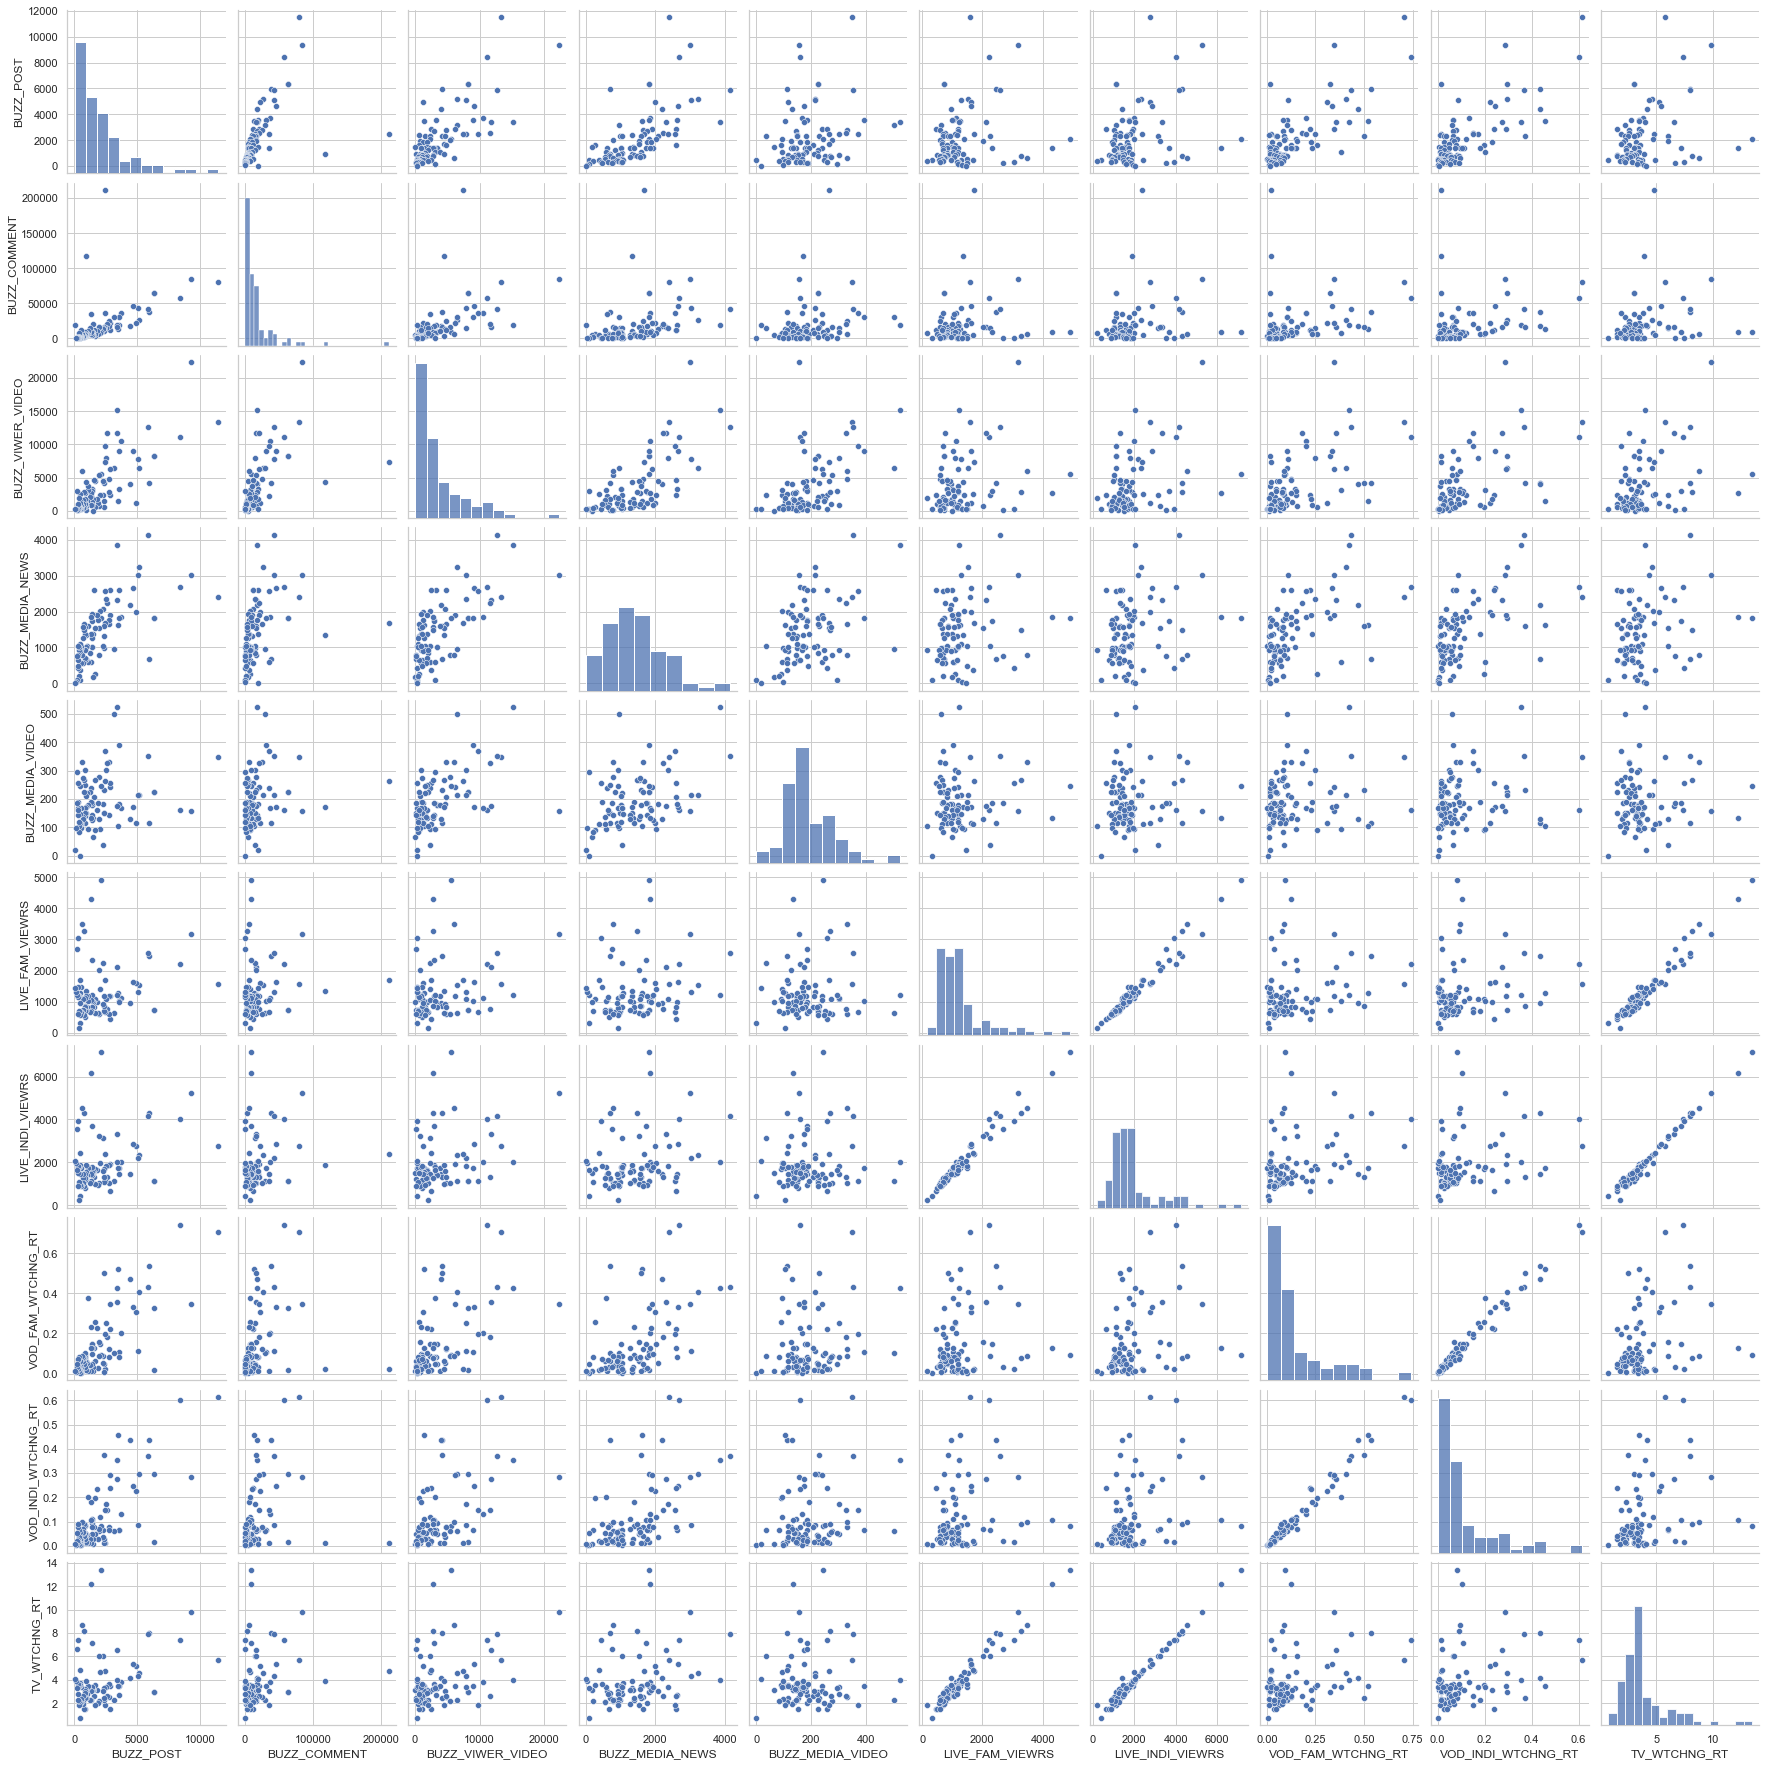

In [339]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(df[['BUZZ_POST', 'BUZZ_COMMENT', 'BUZZ_VIWER_VIDEO',
       'BUZZ_MEDIA_NEWS', 'BUZZ_MEDIA_VIDEO', 'LIVE_FAM_VIEWRS',
       'LIVE_INDI_VIEWRS', 'VOD_FAM_WTCHNG_RT', 'VOD_INDI_WTCHNG_RT', 'TV_WTCHNG_RT']], height = 2.5)
plt.show()

,BUZZ_POST,BUZZ_COMMENT,BUZZ_VIWER_VIDEO,BUZZ_MEDIA_NEWS,BUZZ_MEDIA_VIDEO,LIVE_FAM_VIEWRS,LIVE_INDI_VIEWRS,VOD_FAM_WTCHNG_RT,VOD_INDI_WTCHNG_RT,TV_WTCHNG_RT
BUZZ_POST,1.000000,0.536678,0.760964,0.654063,0.249632,0.197835,0.318776,0.750229,0.753789,0.329019
BUZZ_COMMENT,0.536678,1.000000,0.541280,0.341520,0.214543,0.129164,0.179647,0.258509,0.255776,0.191692
BUZZ_VIWER_VIDEO,0.760964,0.541280,1.000000,0.701919,0.514956,0.257770,0.357734,0.567256,0.557962,0.357336
BUZZ_MEDIA_NEWS,0.654063,0.341520,0.701919,1.000000,0.420610,0.181670,0.262811,0.545036,0.546778,0.260655
BUZZ_MEDIA_VIDEO,0.249632,0.214543,0.514956,0.420610,1.000000,0.042418,0.051870,0.176333,0.183689,0.034791
LIVE_FAM_VIEWRS,0.197835,0.129164,0.257770,0.181670,0.042418,1.000000,0.982446,0.192669,0.201352,0.975301
LIVE_INDI_VIEWRS,0.318776,0.179647,0.357734,0.262811,0.051870,0.982446,1.000000,0.302694,0.301665,0.990222
VOD_FAM_WTCHNG_RT,0.750229,0.258509,0.567256,0.545036,0.176333,0.192669,0.302694,1.000000,0.987057,0.300072
VOD_INDI_WTCHNG_RT,0.753789,0.255776,0.557962,0.546778,0.183689,0.201352,0.301665,0.987057,1.000000,0.304108
TV_WTCHNG_RT,0.329019,0.191692,0.357336,0.260655,0.034791,0.975301,0.990222,0.300072,0.304108,1.000000


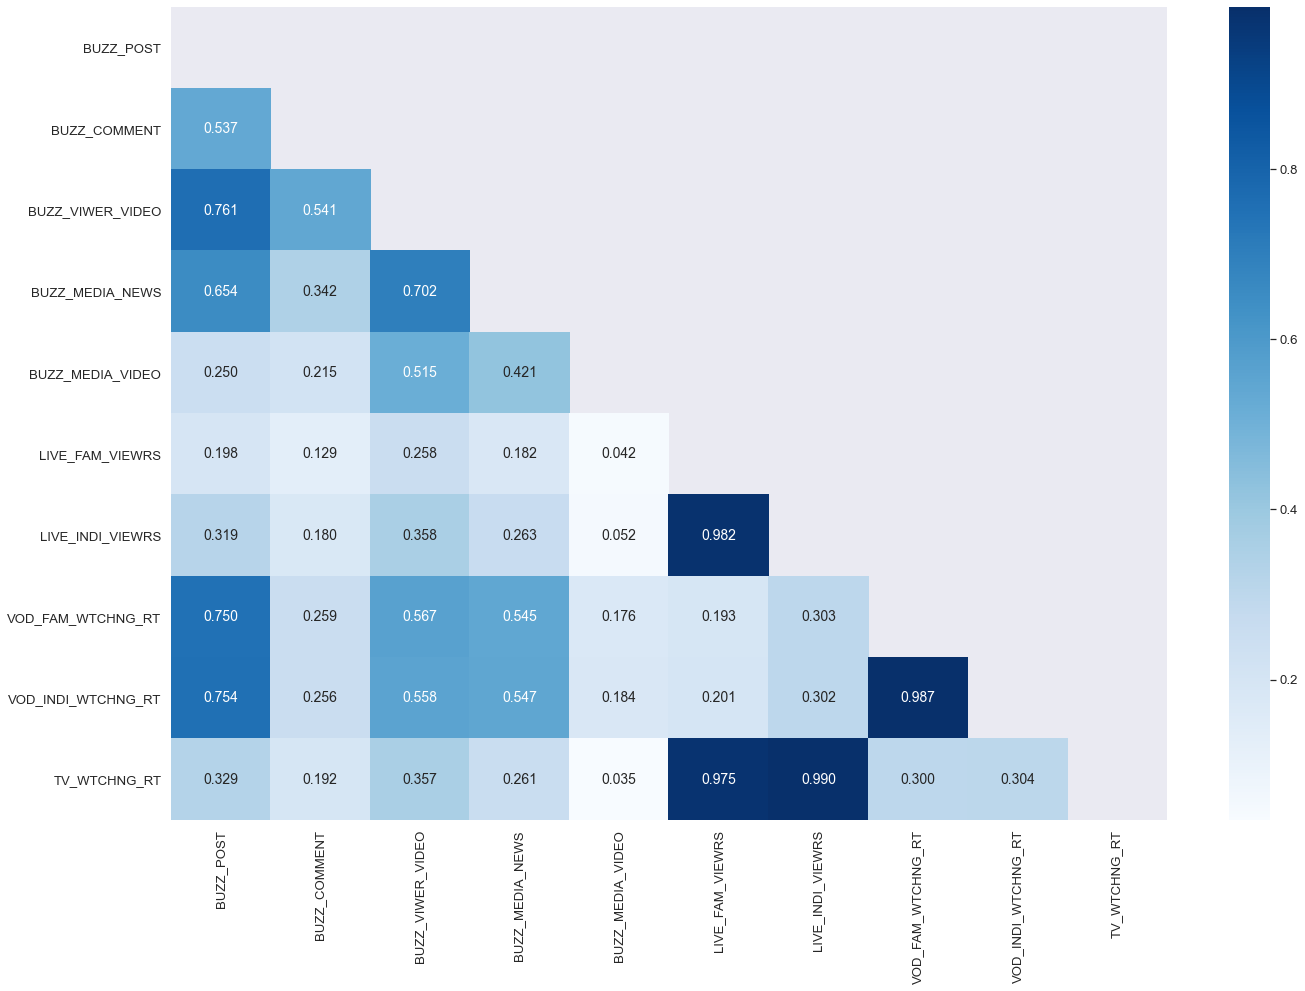

In [340]:
cols = ['BUZZ_POST', 'BUZZ_COMMENT', 'BUZZ_VIWER_VIDEO',
       'BUZZ_MEDIA_NEWS', 'BUZZ_MEDIA_VIDEO', 'LIVE_FAM_VIEWRS',
       'LIVE_INDI_VIEWRS', 'VOD_FAM_WTCHNG_RT', 'VOD_INDI_WTCHNG_RT', 'TV_WTCHNG_RT']

corr = df[cols].corr(method = 'pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

display(corr)

cols_view = ['BUZZ_POST', 'BUZZ_COMMENT', 'BUZZ_VIWER_VIDEO',
       'BUZZ_MEDIA_NEWS', 'BUZZ_MEDIA_VIDEO', 'LIVE_FAM_VIEWRS',
       'LIVE_INDI_VIEWRS', 'VOD_FAM_WTCHNG_RT', 'VOD_INDI_WTCHNG_RT', 'TV_WTCHNG_RT']

sns.set(rc = {'figure.figsize':(20,14)}, font_scale = 1.2)
df_hm = sns.heatmap(corr.values, cmap = "Blues", cbar = True, annot = True, xticklabels = cols_view, 
                 yticklabels = cols_view, fmt = '.3f', annot_kws = {'size':14}, mask = mask)       

plt.tight_layout()
plt.show()


In [267]:
program.head()

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_PROGRAM_STR_DATE,RC_CHNNEL_NM,RC_PROGRAM_DAYS,TV,VOD
0,CODE_0001,휴먼다큐사노라면,2012.03.07,MBN,금,N,Y
1,CODE_0002,환경스페셜,2021.03.04,KBS2,목,N,Y
2,CODE_0003,화요청백전,2021.04.27,TV CHOS,화,Y,N
3,CODE_0004,홍천기,2021.08.30,SBS,월화,Y,Y
4,CODE_0005,홍진경의영화로운덕후생활,2021.07.23,tvN,금,N,N


In [ ]:
racoi_groupby_name[]

In [272]:
racoi_tv = pd.merge(left = racoi_groupby_name, right = tv_groupby_name, how="inner", on = "PROGRAM_CODE" )

In [273]:
racoi_tv_vod = pd.merge(left = racoi_tv, right = vod_groupby_name, how="inner", on = "PROGRAM_CODE" )

In [274]:
display(racoi_tv_vod)

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_POST,RC_BUZZ_VIWER_COMMENT,RC_BUZZ_VIWER_VIDEO,RC_BUZZ_MEDIA_NEWS,RC_BUZZ_MEDIA_VIDEO,RC_LIVE_FAMILY_VIEWRS,...,VOD_FEMALE_N40S_WTCHNG_MIN,VOD_FEMALE_N40S_WTCHNG_RT,VOD_MALE_N50S_WTCHNG_MIN,VOD_MALE_N50S_WTCHNG_RT,VOD_FEMALE_N50S_WTCHNG_MIN,VOD_FEMALE_N50S_WTCHNG_RT,VOD_MALE_N60S_WTCHNG_MIN,VOD_MALE_N60S_WTCHNG_RT,VOD_FEMALE_N60S_WTCHNG_MIN,VOD_FEMALE_N60S_WTCHNG_RT
0,CODE_0297,갯마을차차차,tvN,토일,11486.333333,80168.000000,13308.333333,2396.333333,347.333333,1579.000000,...,7.822667,1.738333,4.436333,1.054667,3.917667,0.925667,0.511333,0.120333,1.461667,0.325000
1,CODE_0028,펜트하우스3,SBS,금,9340.800000,84294.800000,22316.600000,3014.600000,156.200000,3188.250000,...,1.230500,0.432500,0.622000,0.227500,0.898000,0.309500,0.519000,0.186000,0.769250,0.274500
2,CODE_0134,슬기로운의사생활2,tvN,수목,8414.800000,57241.200000,11166.400000,2677.200000,160.000000,2217.250000,...,4.371250,1.351000,1.907000,0.583500,1.339000,0.481750,0.565750,0.169250,0.605000,0.196500
3,CODE_0301,강철부대,채널A/SKY,화,6319.000000,64218.000000,8212.666667,1824.333333,224.666667,713.000000,...,2.385500,0.699500,0.403500,0.119000,0.837500,0.247500,0.513000,0.152000,0.337500,0.099500
4,CODE_0301,강철부대,채널A/SKY,화,6319.000000,64218.000000,8212.666667,1824.333333,224.666667,713.000000,...,0.069000,0.032000,0.040000,0.019000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,CODE_0180,밥이되어라,MBC,월화수목금,262.666667,1138.000000,1119.666667,468.666667,188.333333,1472.000000,...,0.030333,0.005000,1.138333,0.290333,1.104667,0.279333,0.012333,0.002000,0.034000,0.005667
86,CODE_0279,국가대표와이프,KBS1,월화수목금,233.500000,523.500000,117.000000,756.000000,184.500000,2691.000000,...,0.000000,0.000000,0.049000,0.009000,0.151000,0.027000,0.104000,0.019000,0.107000,0.019000
87,CODE_0116,"아모르파티사랑하라,지금",SBS,월화수목금,184.166667,879.666667,3051.333333,84.333333,295.333333,1195.833333,...,0.253000,0.037800,0.684600,0.107400,0.751400,0.117400,0.055200,0.008200,0.186600,0.027600
88,CODE_0142,순간포착세상에이런일이,SBS,화,113.500000,926.500000,288.166667,41.000000,98.000000,1317.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [277]:
racoi_tv_vod_columns = racoi_tv_vod.columns 

In [300]:
pd.set_option('display.max_row', 90)
pd.set_option('display.max_columns', 60)

In [284]:
racoi_tv_vod_columns

Index(['PROGRAM_CODE', 'RC_PROGRAM_NAME', 'RC_CHNNEL_NM', 'RC_PROGRAM_DAYS',
       'RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO',
       'RC_BUZZ_MEDIA_NEWS', 'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       ...
       'VOD_FEMALE_N40S_WTCHNG_MIN', 'VOD_FEMALE_N40S_WTCHNG_RT',
       'VOD_MALE_N50S_WTCHNG_MIN', 'VOD_MALE_N50S_WTCHNG_RT',
       'VOD_FEMALE_N50S_WTCHNG_MIN', 'VOD_FEMALE_N50S_WTCHNG_RT',
       'VOD_MALE_N60S_WTCHNG_MIN', 'VOD_MALE_N60S_WTCHNG_RT',
       'VOD_FEMALE_N60S_WTCHNG_MIN', 'VOD_FEMALE_N60S_WTCHNG_RT'],
      dtype='object', length=102)

In [286]:
tv.columns

Index(['TV_No', 'TV_MONTH', 'PROGRAM_CODE', 'TV_PROGRAM_NAME',
       'TV_PROGRAM_GENRE', 'TV_CHNNEL_NM', 'TV_ALL_WTCHNG_MIN',
       'TV_ALL_WTCHNG_RT', 'TV_MALE_4_9YO_WTCHNG_MIN',
       'TV_MALE_4_9YO_WTCHNG_RT', 'TV_FEMALE_4_9YO_WTCHNG_MIN',
       'TV_FEMALE_4_9YO_WTCHNG_RT', 'TV_MALE_N10S_WTCHNG_MIN',
       'TV_MALE_N10S_WTCHNG_RT', 'TV_FEMALE_N10S_WTCHNG_MIN',
       'TV_FEMALE_N10S_WTCHNG_RT', 'TV_MALE_N20S_WTCHNG_MIN',
       'TV_MALE_N20S_WTCHNG_RT', 'TV_FEMALE_N20S_WTCHNG_MIN',
       'TV_FEMALE_N20S_WTCHNG_RT', 'TV_MALE_N30S_WTCHNG_MIN',
       'TV_MALE_N30S_WTCHNG_RT', 'TV_FEMALE_N30S_WTCHNG_MIN',
       'TV_FEMALE_N30S_WTCHNG_RT', 'TV_MALE_N40S_WTCHNG_MIN',
       'TV_MALE_N40S_WTCHNG_RT', 'TV_FEMALE_N40S_WTCHNG_MIN',
       'TV_FEMALE_N40S_WTCHNG_RT', 'TV_MALE_N50S_WTCHNG_MIN',
       'TV_MALE_N50S_WTCHNG_RT', 'TV_FEMALE_N50S_WTCHNG_MIN',
       'TV_FEMALE_N50S_WTCHNG_RT', 'TV_MALE_N60S_WTCHNG_MIN',
       'TV_MALE_N60S_WTCHNG_RT', 'TV_FEMALE_N60S_WTCHNG_MIN',
       'T

In [285]:
vod.columns

Index(['VOD_NO', 'VOD_MONTH', 'VOD_PROGRAM_NAME', 'PROGRAM_CODE',
       'VOD_PROGRAM_GENRE', 'VOD_CHNNEL_NM', 'VOD_FAMILY_WTCHNG_MIN',
       'VOD_FAMILY_WTCHNG_RT', 'VOD_INDIVIDUAL_WTCHNG_MIN',
       'VOD_INDIVIDUAL_WTCHNG_RT', 'VOD_MALE_WTCHNG_MIN', 'VOD_MALE_WTCHNG_RT',
       'VOD_FEMALE_WTCHNG_MIN', 'VOD_FEMALE_WTCHNG_RT', 'VOD_4_9YO_WTCHNG_MIN',
       'VOD_4_9YO_WTCHNG_RT', 'VOD_N10S_WTCHNG_MIN', 'VOD_N10S_WTCHNG_RT',
       'VOD_N20S_WTCHNG_MIN', 'VOD_N20S_WTCHNG_RT', 'VOD_N30S_WTCHNG_MIN',
       'VOD_N30S_WTCHNG_RT', 'VOD_N40S_WTCHNG_MIN', 'VOD_N40S_WTCHNG_RT',
       'VOD_N50S_WTCHNG_MIN', 'VOD_N50S_WTCHNG_RT', 'VOD_N60S_WTCHNG_MIN',
       'VOD_N60S_WTCHNG_RT', 'VOD_MALE_4_9YO_WTCHNG_MIN',
       'VOD_MALE_4_9YO_WTCHNG_RT', 'VOD_FEMALE_4_9YO_WTCHNG_MIN',
       'VOD_FEMALE_4_9YO_WTCHNG_RT', 'VOD_MALE_N10S_WTCHNG_MIN',
       'VOD_MALE_N10S_WTCHNG_RT', 'VOD_FEMALE_N10S_WTCHNG_MIN',
       'VOD_FEMALE_N10S_WTCHNG_RT', 'VOD_MALE_N20S_WTCHNG_MIN',
       'VOD_MALE_N20S_WTCHNG

In [ ]:
racoi_tv_vod_columns_drop = racoi_tv_vod_columns.drop(['VOD_NO', 'VOD_MONTH', 'VOD_PROGRAM_NAME'])

In [341]:
corr.to_excel('C:\\Users\\kjh12\\Desktop\\corr.xlsx')

In [349]:
racoi_groupby_name.columns

Index(['PROGRAM_CODE', 'RC_PROGRAM_NAME', 'RC_CHNNEL_NM', 'RC_PROGRAM_DAYS',
       'RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO',
       'RC_BUZZ_MEDIA_NEWS', 'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       'RC_LIVE_INDIVIDUAL_VIEWRS', 'RC_LIVE_MALE_VIEWRS',
       'RC_LIVE_FEMALE_VIEWRS', 'RC_LIVE_10S_VIEWRS', 'RC_LIVE_20S_VIEWRS',
       'RC_LIVE_30S_VIEWRS', 'RC_LIVE_40S_VIEWRS', 'RC_LIVE_50S_VIEWRS'],
      dtype='object')

In [ ]:
racoi_groupby_name

In [362]:
racoi_groupby_name[['PROGRAM_CODE', 'RC_PROGRAM_NAME','RC_CHNNEL_NM','RC_PROGRAM_DAYS','RC_BUZZ_VIWER_POST']].sort_values(by = 'RC_BUZZ_VIWER_POST', ascending=False)[:10]

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_POST
137,CODE_0138,스트릿우먼파이터,Mnet,화,22175.333333
296,CODE_0297,갯마을차차차,tvN,토일,11486.333333
143,CODE_0144,쇼미더머니10,Mnet,금,9453.500000
27,CODE_0028,펜트하우스3,SBS,금,9340.800000
133,CODE_0134,슬기로운의사생활2,tvN,수목,8414.800000
294,CODE_0295,걸스플래닛999:소녀대전,Mnet,금,6368.000000
300,CODE_0301,강철부대,채널A/SKY,화,6319.000000
163,CODE_0164,빈센조,tvN,토일,5942.000000
197,CODE_0198,모범택시,SBS,금,5879.000000
3,CODE_0004,홍천기,SBS,월화,5172.333333


In [363]:
racoi_groupby_name[['PROGRAM_CODE', 'RC_PROGRAM_NAME','RC_CHNNEL_NM','RC_PROGRAM_DAYS','RC_BUZZ_VIWER_COMMENT']].sort_values(by = 'RC_BUZZ_VIWER_COMMENT', ascending=False)[:10]

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_COMMENT
31,CODE_0032,킹덤:레전더리워,Mnet,목,342113.500000
137,CODE_0138,스트릿우먼파이터,Mnet,화,265441.333333
121,CODE_0122,신청곡을불러드립니다사랑의콜센타,TV CHOS,목,211635.800000
294,CODE_0295,걸스플래닛999:소녀대전,Mnet,금,145622.000000
192,CODE_0193,문명특급컴눈명스페셜,SBS,금,132841.000000
159,CODE_0160,뽕숭아학당,TV CHOS,수,117924.500000
27,CODE_0028,펜트하우스3,SBS,금,84294.800000
296,CODE_0297,갯마을차차차,tvN,토일,80168.000000
143,CODE_0144,쇼미더머니10,Mnet,금,78347.000000
300,CODE_0301,강철부대,채널A/SKY,화,64218.000000


In [364]:
racoi_groupby_name[['PROGRAM_CODE', 'RC_PROGRAM_NAME','RC_CHNNEL_NM','RC_PROGRAM_DAYS','RC_BUZZ_VIWER_VIDEO']].sort_values(by = 'RC_BUZZ_VIWER_VIDEO', ascending=False)[:10]

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_VIWER_VIDEO
137,CODE_0138,스트릿우먼파이터,Mnet,화,41326.000000
27,CODE_0028,펜트하우스3,SBS,금,22316.600000
31,CODE_0032,킹덤:레전더리워,Mnet,목,17099.000000
294,CODE_0295,걸스플래닛999:소녀대전,Mnet,금,16606.500000
205,CODE_0206,마인,tvN,토일,15216.000000
143,CODE_0144,쇼미더머니10,Mnet,금,13948.500000
296,CODE_0297,갯마을차차차,tvN,토일,13308.333333
197,CODE_0198,모범택시,SBS,금,12677.000000
70,CODE_0071,원더우먼,SBS,금,11724.666667
303,CODE_0303,간떨어지는동거,tvN,수목,11664.666667


In [365]:
racoi_groupby_name[['PROGRAM_CODE', 'RC_PROGRAM_NAME','RC_CHNNEL_NM','RC_PROGRAM_DAYS','RC_BUZZ_MEDIA_NEWS']].sort_values(by = 'RC_BUZZ_MEDIA_NEWS', ascending=False)[:10]

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_MEDIA_NEWS
197,CODE_0198,모범택시,SBS,금,4140.000000
137,CODE_0138,스트릿우먼파이터,Mnet,화,3981.000000
205,CODE_0206,마인,tvN,토일,3863.500000
3,CODE_0004,홍천기,SBS,월화,3244.333333
352,CODE_0352,나혼자산다,MBC,금,3018.000000
27,CODE_0028,펜트하우스3,SBS,금,3014.600000
133,CODE_0134,슬기로운의사생활2,tvN,수목,2677.200000
244,CODE_0245,놀면뭐하니?,MBC,토,2661.000000
86,CODE_0087,오월의청춘,KBS2,월화,2615.000000
216,CODE_0217,라디오스타,MBC,수,2605.166667


In [366]:
racoi_groupby_name[['PROGRAM_CODE', 'RC_PROGRAM_NAME','RC_CHNNEL_NM','RC_PROGRAM_DAYS','RC_BUZZ_MEDIA_VIDEO']].sort_values(by = 'RC_BUZZ_MEDIA_VIDEO', ascending=False)[:10]

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,RC_BUZZ_MEDIA_VIDEO
205,CODE_0206,마인,tvN,토일,523.500000
245,CODE_0246,놀라운토요일,tvN,토,500.000000
137,CODE_0138,스트릿우먼파이터,Mnet,화,441.000000
67,CODE_0068,유퀴즈온더블럭,tvN,수,391.833333
294,CODE_0295,걸스플래닛999:소녀대전,Mnet,금,390.500000
105,CODE_0106,어느날우리집현관으로멸망이들어왔다,tvN,월화,369.666667
197,CODE_0198,모범택시,SBS,금,352.000000
296,CODE_0297,갯마을차차차,tvN,토일,347.333333
188,CODE_0189,미스몬테크리스토,KBS2,월화수목금,330.333333
116,CODE_0117,아는형님,JTBC,토,329.500000


In [371]:
racoi_groupby_name.columns

Index(['PROGRAM_CODE', 'RC_PROGRAM_NAME', 'RC_CHNNEL_NM', 'RC_PROGRAM_DAYS',
       'RC_BUZZ_VIWER_POST', 'RC_BUZZ_VIWER_COMMENT', 'RC_BUZZ_VIWER_VIDEO',
       'RC_BUZZ_MEDIA_NEWS', 'RC_BUZZ_MEDIA_VIDEO', 'RC_LIVE_FAMILY_VIEWRS',
       'RC_LIVE_INDIVIDUAL_VIEWRS', 'RC_LIVE_MALE_VIEWRS',
       'RC_LIVE_FEMALE_VIEWRS', 'RC_LIVE_10S_VIEWRS', 'RC_LIVE_20S_VIEWRS',
       'RC_LIVE_30S_VIEWRS', 'RC_LIVE_40S_VIEWRS', 'RC_LIVE_50S_VIEWRS'],
      dtype='object')

In [372]:
racoi_groupby_name['LIVE_VIEWRS'] =  racoi_groupby_name['RC_LIVE_FAMILY_VIEWRS'] + racoi_groupby_name['RC_LIVE_INDIVIDUAL_VIEWRS']

In [373]:
racoi_groupby_name[['PROGRAM_CODE', 'RC_PROGRAM_NAME','RC_CHNNEL_NM','RC_PROGRAM_DAYS','LIVE_VIEWRS']].sort_values(by = 'LIVE_VIEWRS', ascending=False)[:10]

,PROGRAM_CODE,RC_PROGRAM_NAME,RC_CHNNEL_NM,RC_PROGRAM_DAYS,LIVE_VIEWRS
84,CODE_0085,오케이광자매,KBS2,토일,12064.000000
124,CODE_0125,신사와아가씨,KBS2,토일,10492.000000
27,CODE_0028,펜트하우스3,SBS,금,8439.500000
188,CODE_0189,미스몬테크리스토,KBS2,월화수목금,8037.666667
161,CODE_0162,빨강구두,KBS2,월화수목금,7580.500000
147,CODE_0148,속아도꿈결,KBS1,월화수목금,6965.333333
163,CODE_0164,빈센조,tvN,토일,6764.000000
197,CODE_0198,모범택시,SBS,금,6718.000000
133,CODE_0134,슬기로운의사생활2,tvN,수목,6254.000000
278,CODE_0279,국가대표와이프,KBS1,월화수목금,6247.000000


In [360]:
racoi

(1292, 20)

In [359]:
racoi_groupby_name.shape

(364, 18)

In [374]:
# tv groupby
tv_groupby_name = tv.groupby(['TV_PROGRAM_NAME', 'PROGRAM_CODE','TV_PROGRAM_GENRE'],as_index=False).mean().sort_values(by=["TV_ALL_WTCHNG_RT"], ascending = [False] )
display(tv_groupby_name[0:10])

,TV_PROGRAM_NAME,PROGRAM_CODE,TV_PROGRAM_GENRE,TV_ALL_WTCHNG_MIN,TV_ALL_WTCHNG_RT,TV_MALE_4_9YO_WTCHNG_MIN,TV_MALE_4_9YO_WTCHNG_RT,TV_FEMALE_4_9YO_WTCHNG_MIN,TV_FEMALE_4_9YO_WTCHNG_RT,TV_MALE_N10S_WTCHNG_MIN,TV_MALE_N10S_WTCHNG_RT,TV_FEMALE_N10S_WTCHNG_MIN,TV_FEMALE_N10S_WTCHNG_RT,TV_MALE_N20S_WTCHNG_MIN,TV_MALE_N20S_WTCHNG_RT,TV_FEMALE_N20S_WTCHNG_MIN,TV_FEMALE_N20S_WTCHNG_RT,TV_MALE_N30S_WTCHNG_MIN,TV_MALE_N30S_WTCHNG_RT,TV_FEMALE_N30S_WTCHNG_MIN,TV_FEMALE_N30S_WTCHNG_RT,TV_MALE_N40S_WTCHNG_MIN,TV_MALE_N40S_WTCHNG_RT,TV_FEMALE_N40S_WTCHNG_MIN,TV_FEMALE_N40S_WTCHNG_RT,TV_MALE_N50S_WTCHNG_MIN,TV_MALE_N50S_WTCHNG_RT,TV_FEMALE_N50S_WTCHNG_MIN,TV_FEMALE_N50S_WTCHNG_RT,TV_MALE_N60S_WTCHNG_MIN,TV_MALE_N60S_WTCHNG_RT,TV_FEMALE_N60S_WTCHNG_MIN,TV_FEMALE_N60S_WTCHNG_RT
85,주말드라마<오케이광자매>,CODE_0085,드라마&영화,72.290600,13.43440,24.605400,4.66460,43.92000,8.14560,23.658800,4.31920,30.26880,5.68800,31.269000,5.82200,34.50360,6.38840,24.894800,4.718000,37.971200,7.147000,37.94120,7.09400,57.041000,10.603600,84.26680,15.628600,119.522200,22.27220,124.503800,23.061400,148.773800,27.567600
84,주말드라마<신사와아가씨>,CODE_0125,드라마&영화,53.891000,12.17650,21.896500,4.98050,28.58950,6.66500,20.035500,4.56500,21.43550,4.24500,18.065500,4.31300,24.27150,4.96900,18.924500,4.655000,32.979500,7.352500,26.81800,5.92550,38.902500,8.960000,60.50200,13.722000,89.687000,20.65850,94.494000,21.348500,114.223500,25.615500
11,금요드라마<펜트하우스3>,CODE_0028,드라마&영화,27.041250,9.78000,14.853250,5.63875,23.93025,9.06200,17.676500,6.18300,25.55900,9.27350,15.774250,5.69975,23.14100,8.37100,16.097500,5.839750,22.826000,8.213500,24.50275,8.75150,37.600500,13.341500,37.63225,13.633750,51.092750,18.60725,23.978000,8.693750,25.884500,9.415750
77,일일드라마<미스몬테크리스토>,CODE_0189,드라마&영화,66.769500,8.73250,20.364000,2.66350,43.67400,5.71100,34.716500,4.53500,19.18700,2.50500,19.178000,2.50850,26.33950,3.44900,29.633000,3.874500,43.288000,5.662500,29.83650,3.90650,48.787000,6.377000,53.93800,7.057500,92.537000,12.09850,127.021000,16.611500,157.368000,20.585500
79,일일드라마<빨강구두>,CODE_0162,드라마&영화,52.754250,8.14225,20.228250,3.07200,23.31175,3.67300,20.055500,3.13075,16.66525,2.53775,14.563250,2.25125,16.40725,2.50625,23.902000,3.652500,32.810250,5.094250,23.82925,3.71500,28.632500,4.452500,38.77025,5.999000,78.788000,12.14375,101.534000,15.674500,134.006250,20.648750
42,빈센조(본),CODE_0164,드라마&영화,14.193000,7.97300,10.096000,5.67200,4.95400,2.78300,9.014000,5.06400,9.77600,5.49200,8.745000,4.91300,14.16900,7.96000,9.801000,5.506000,15.495000,8.705000,19.43700,10.92000,25.337000,14.234000,18.31500,10.289000,22.730000,12.77000,10.576000,5.942000,10.001000,5.618000
13,금토드라마<모범택시>,CODE_0198,드라마&영화,46.325000,7.96000,25.931000,4.45500,30.58900,5.25600,27.243000,4.68100,25.74700,4.42400,28.971000,4.97800,25.96300,4.46100,31.837000,5.470000,44.170000,7.589000,64.95800,11.16100,68.308000,11.737000,75.94000,13.048000,73.098000,12.56000,40.321000,6.928000,39.784000,6.836000
80,일일드라마<속아도꿈결>,CODE_0148,드라마&영화,39.208600,7.38740,11.944000,2.21060,16.02340,3.00980,21.127200,3.93060,9.04420,1.70380,8.917000,1.67200,12.12280,2.25020,13.741200,2.580400,17.522200,3.286000,14.14660,2.68860,16.709200,3.141800,28.51500,5.405800,55.362200,10.42360,88.125800,16.643800,102.403800,19.293000
55,슬기로운의사생활시즌2(본),CODE_0134,드라마&영화,22.851250,7.37400,17.121500,5.58025,20.04700,6.36825,16.533250,5.42325,21.18175,6.73200,13.411500,4.31100,22.83775,7.42925,15.757750,5.088750,28.138500,9.176750,28.56000,9.22225,51.945750,16.670500,31.52525,10.182000,34.415000,11.08850,10.000750,3.264500,11.126500,3.558000
34,미운우리새끼,CODE_0188,오락,31.227833,7.17300,12.513833,2.85550,16.13600,3.65700,18.712667,4.26350,17.93100,4.11750,12.667833,2.89200,18.25500,4.18200,17.771667,4.146333,24.400833,5.597333,41.46850,9.56800,41.431333,9.662833,40.95200,9.399833,48.623833,11.18500,32.558833,7.425833,42.653333,9.732833


In [375]:
tv_groupby_name.columns

Index(['TV_PROGRAM_NAME', 'PROGRAM_CODE', 'TV_PROGRAM_GENRE',
       'TV_ALL_WTCHNG_MIN', 'TV_ALL_WTCHNG_RT', 'TV_MALE_4_9YO_WTCHNG_MIN',
       'TV_MALE_4_9YO_WTCHNG_RT', 'TV_FEMALE_4_9YO_WTCHNG_MIN',
       'TV_FEMALE_4_9YO_WTCHNG_RT', 'TV_MALE_N10S_WTCHNG_MIN',
       'TV_MALE_N10S_WTCHNG_RT', 'TV_FEMALE_N10S_WTCHNG_MIN',
       'TV_FEMALE_N10S_WTCHNG_RT', 'TV_MALE_N20S_WTCHNG_MIN',
       'TV_MALE_N20S_WTCHNG_RT', 'TV_FEMALE_N20S_WTCHNG_MIN',
       'TV_FEMALE_N20S_WTCHNG_RT', 'TV_MALE_N30S_WTCHNG_MIN',
       'TV_MALE_N30S_WTCHNG_RT', 'TV_FEMALE_N30S_WTCHNG_MIN',
       'TV_FEMALE_N30S_WTCHNG_RT', 'TV_MALE_N40S_WTCHNG_MIN',
       'TV_MALE_N40S_WTCHNG_RT', 'TV_FEMALE_N40S_WTCHNG_MIN',
       'TV_FEMALE_N40S_WTCHNG_RT', 'TV_MALE_N50S_WTCHNG_MIN',
       'TV_MALE_N50S_WTCHNG_RT', 'TV_FEMALE_N50S_WTCHNG_MIN',
       'TV_FEMALE_N50S_WTCHNG_RT', 'TV_MALE_N60S_WTCHNG_MIN',
       'TV_MALE_N60S_WTCHNG_RT', 'TV_FEMALE_N60S_WTCHNG_MIN',
       'TV_FEMALE_N60S_WTCHNG_RT'],
      dtype='obje

In [379]:
tv_all = tv_groupby_name[['PROGRAM_CODE', 'TV_PROGRAM_NAME', 'TV_PROGRAM_GENRE', 'TV_ALL_WTCHNG_RT' ]][:10]
tv_all

,PROGRAM_CODE,TV_PROGRAM_NAME,TV_PROGRAM_GENRE,TV_ALL_WTCHNG_RT
85,CODE_0085,주말드라마<오케이광자매>,드라마&영화,13.43440
84,CODE_0125,주말드라마<신사와아가씨>,드라마&영화,12.17650
11,CODE_0028,금요드라마<펜트하우스3>,드라마&영화,9.78000
77,CODE_0189,일일드라마<미스몬테크리스토>,드라마&영화,8.73250
79,CODE_0162,일일드라마<빨강구두>,드라마&영화,8.14225
42,CODE_0164,빈센조(본),드라마&영화,7.97300
13,CODE_0198,금토드라마<모범택시>,드라마&영화,7.96000
80,CODE_0148,일일드라마<속아도꿈결>,드라마&영화,7.38740
55,CODE_0134,슬기로운의사생활시즌2(본),드라마&영화,7.37400
34,CODE_0188,미운우리새끼,오락,7.17300


In [389]:
tv_groupby_name['4_9YO'] = (tv_groupby_name['TV_MALE_4_9YO_WTCHNG_RT']/2 + tv_groupby_name['TV_FEMALE_4_9YO_WTCHNG_RT']/2)
tv_groupby_name['10s'] = (tv_groupby_name['TV_MALE_N10S_WTCHNG_RT']/2 + tv_groupby_name['TV_FEMALE_N10S_WTCHNG_RT']/2)
tv_groupby_name['20s'] = (tv_groupby_name['TV_MALE_N20S_WTCHNG_RT']/2 + tv_groupby_name['TV_FEMALE_N20S_WTCHNG_RT']/2)
tv_groupby_name['30s'] = (tv_groupby_name['TV_MALE_N30S_WTCHNG_RT']/2 + tv_groupby_name['TV_FEMALE_N30S_WTCHNG_RT']/2)
tv_groupby_name['40s'] = (tv_groupby_name['TV_MALE_N40S_WTCHNG_RT']/2 + tv_groupby_name['TV_FEMALE_N40S_WTCHNG_RT']/2)
tv_groupby_name['50s'] = (tv_groupby_name['TV_MALE_N50S_WTCHNG_RT']/2 + tv_groupby_name['TV_FEMALE_N50S_WTCHNG_RT']/2)
tv_groupby_name['60s'] = (tv_groupby_name['TV_MALE_N60S_WTCHNG_RT']/2 + tv_groupby_name['TV_FEMALE_N60S_WTCHNG_RT']/2)

In [390]:
tv_groupby_name.columns

Index(['TV_PROGRAM_NAME', 'PROGRAM_CODE', 'TV_PROGRAM_GENRE',
       'TV_ALL_WTCHNG_MIN', 'TV_ALL_WTCHNG_RT', 'TV_MALE_4_9YO_WTCHNG_MIN',
       'TV_MALE_4_9YO_WTCHNG_RT', 'TV_FEMALE_4_9YO_WTCHNG_MIN',
       'TV_FEMALE_4_9YO_WTCHNG_RT', 'TV_MALE_N10S_WTCHNG_MIN',
       'TV_MALE_N10S_WTCHNG_RT', 'TV_FEMALE_N10S_WTCHNG_MIN',
       'TV_FEMALE_N10S_WTCHNG_RT', 'TV_MALE_N20S_WTCHNG_MIN',
       'TV_MALE_N20S_WTCHNG_RT', 'TV_FEMALE_N20S_WTCHNG_MIN',
       'TV_FEMALE_N20S_WTCHNG_RT', 'TV_MALE_N30S_WTCHNG_MIN',
       'TV_MALE_N30S_WTCHNG_RT', 'TV_FEMALE_N30S_WTCHNG_MIN',
       'TV_FEMALE_N30S_WTCHNG_RT', 'TV_MALE_N40S_WTCHNG_MIN',
       'TV_MALE_N40S_WTCHNG_RT', 'TV_FEMALE_N40S_WTCHNG_MIN',
       'TV_FEMALE_N40S_WTCHNG_RT', 'TV_MALE_N50S_WTCHNG_MIN',
       'TV_MALE_N50S_WTCHNG_RT', 'TV_FEMALE_N50S_WTCHNG_MIN',
       'TV_FEMALE_N50S_WTCHNG_RT', 'TV_MALE_N60S_WTCHNG_MIN',
       'TV_MALE_N60S_WTCHNG_RT', 'TV_FEMALE_N60S_WTCHNG_MIN',
       'TV_FEMALE_N60S_WTCHNG_RT', '10s', '4_9YO', '2

In [395]:
tv_rt = tv_groupby_name[['PROGRAM_CODE', 'TV_PROGRAM_NAME', 'TV_PROGRAM_GENRE', 'TV_ALL_WTCHNG_RT', '4_9YO', '10s', '20s', '30s', '40s', '50s','60s']]

In [393]:
tv_rt.to_excel('C:\\Users\\kjh12\\Desktop\\tv_rt2.xlsx')

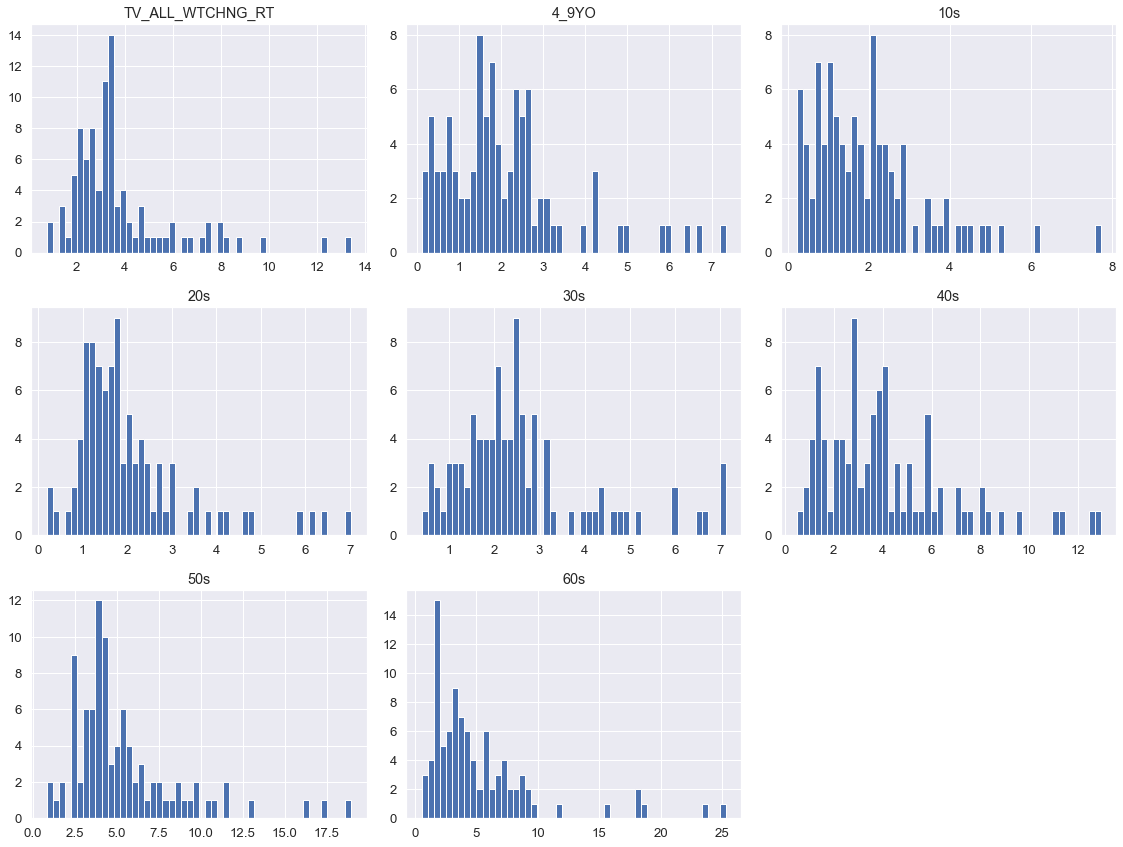

In [396]:
tv_rt.hist(figsize = (16, 12), bins = 50)
plt.tight_layout()
plt.show()

In [413]:
tv_rt.groupby(by='PROGRAM_CODE').mean().describe

<bound method NDFrame.describe of               TV_ALL_WTCHNG_RT     4_9YO       10s       20s       30s  \
PROGRAM_CODE                                                             
CODE_0003             2.545000  0.179000  0.217000  1.321000  1.126500   
CODE_0004             4.595000  2.003500  2.183500  2.185000  2.586250   
CODE_0012             2.071000  0.817500  1.859000  1.034500  2.599000   
CODE_0020             1.846500  1.123750  1.038250  1.022000  1.159250   
CODE_0024             1.487000  0.548000  0.696500  1.360500  0.829000   
...                        ...       ...       ...       ...       ...   
CODE_0334             3.348500  0.734917  0.728000  0.705083  1.405167   
CODE_0339             3.454600  2.626300  1.730000  1.513600  2.030900   
CODE_0345             3.798333  3.107417  3.703417  3.025833  3.337750   
CODE_0352             4.341667  4.222417  3.842000  2.767333  5.189083   
CODE_0359             4.846333  3.944917  2.091417  1.809583  3.215583   

   

In [403]:
display(tv_groupby_name.describe)

<bound method NDFrame.describe of     TV_PROGRAM_NAME PROGRAM_CODE TV_PROGRAM_GENRE  TV_ALL_WTCHNG_MIN  \
85    주말드라마<오케이광자매>    CODE_0085           드라마&영화          72.290600   
84    주말드라마<신사와아가씨>    CODE_0125           드라마&영화          53.891000   
11    금요드라마<펜트하우스3>    CODE_0028           드라마&영화          27.041250   
77  일일드라마<미스몬테크리스토>    CODE_0189           드라마&영화          66.769500   
79      일일드라마<빨강구두>    CODE_0162           드라마&영화          52.754250   
..              ...          ...              ...                ...   
88          풍류대장(본)    CODE_0024               오락           8.520000   
65          언더커버(본)    CODE_0100           드라마&영화          10.647000   
73        유미의세포들(본)    CODE_0066           드라마&영화           9.135000   
83             좋은아침    CODE_0328               오락           8.970000   
48           세계테마기행    CODE_0151               정보          12.495667   

    TV_ALL_WTCHNG_RT  TV_MALE_4_9YO_WTCHNG_MIN  TV_MALE_4_9YO_WTCHNG_RT  \
85         13.434400      

In [414]:
tv_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 85 to 48
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PROGRAM_CODE      93 non-null     object 
 1   TV_PROGRAM_NAME   93 non-null     object 
 2   TV_PROGRAM_GENRE  93 non-null     object 
 3   TV_ALL_WTCHNG_RT  93 non-null     float64
 4   4_9YO             93 non-null     float64
 5   10s               93 non-null     float64
 6   20s               93 non-null     float64
 7   30s               93 non-null     float64
 8   40s               93 non-null     float64
 9   50s               93 non-null     float64
 10  60s               93 non-null     float64
dtypes: float64(8), object(3)
memory usage: 8.7+ KB


In [415]:
tv.head(10)

,TV_No,TV_MONTH,PROGRAM_CODE,TV_PROGRAM_NAME,TV_PROGRAM_GENRE,TV_CHNNEL_NM,TV_ALL_WTCHNG_MIN,TV_ALL_WTCHNG_RT,TV_MALE_4_9YO_WTCHNG_MIN,TV_MALE_4_9YO_WTCHNG_RT,TV_FEMALE_4_9YO_WTCHNG_MIN,TV_FEMALE_4_9YO_WTCHNG_RT,TV_MALE_N10S_WTCHNG_MIN,TV_MALE_N10S_WTCHNG_RT,TV_FEMALE_N10S_WTCHNG_MIN,TV_FEMALE_N10S_WTCHNG_RT,TV_MALE_N20S_WTCHNG_MIN,TV_MALE_N20S_WTCHNG_RT,TV_FEMALE_N20S_WTCHNG_MIN,TV_FEMALE_N20S_WTCHNG_RT,TV_MALE_N30S_WTCHNG_MIN,TV_MALE_N30S_WTCHNG_RT,TV_FEMALE_N30S_WTCHNG_MIN,TV_FEMALE_N30S_WTCHNG_RT,TV_MALE_N40S_WTCHNG_MIN,TV_MALE_N40S_WTCHNG_RT,TV_FEMALE_N40S_WTCHNG_MIN,TV_FEMALE_N40S_WTCHNG_RT,TV_MALE_N50S_WTCHNG_MIN,TV_MALE_N50S_WTCHNG_RT,TV_FEMALE_N50S_WTCHNG_MIN,TV_FEMALE_N50S_WTCHNG_RT,TV_MALE_N60S_WTCHNG_MIN,TV_MALE_N60S_WTCHNG_RT,TV_FEMALE_N60S_WTCHNG_MIN,TV_FEMALE_N60S_WTCHNG_RT
0,TV0086,2021_05,CODE_0003,화요청백전(본),오락,TV조선,11.325,2.545,0.625,0.140,0.968,0.218,1.294,0.291,0.635,0.143,5.649,1.269,6.110,1.373,5.467,1.228,4.562,1.025,7.279,1.636,4.825,1.084,11.979,2.692,23.169,5.206,21.351,4.798,24.358,5.474
1,TV0434,2021_09,CODE_0004,월화드라마<홍천기>,드라마&영화,SBS,16.789,4.550,4.751,1.288,11.357,3.078,8.302,2.250,8.580,2.325,7.998,2.168,6.967,1.888,8.402,2.277,10.237,2.774,21.437,5.810,24.928,6.756,25.490,6.908,32.953,8.930,17.504,4.744,19.083,5.171
2,TV0523,2021_10,CODE_0004,월화드라마<홍천기>,드라마&영화,SBS,22.966,4.640,3.232,0.653,14.825,2.995,11.099,2.242,9.490,1.917,10.622,2.146,12.562,2.538,11.185,2.260,15.020,3.034,25.875,5.227,32.330,6.531,37.293,7.534,49.544,10.009,21.919,4.428,26.640,5.382
3,TV0600,2021_10,CODE_0012,해치지않아(본),오락,tvN,8.427,2.071,3.618,0.889,3.037,0.746,7.740,1.902,7.390,1.816,2.398,0.589,6.022,1.480,9.258,2.275,11.897,2.923,9.220,2.265,17.359,4.265,10.755,2.643,14.255,3.502,5.196,1.277,5.068,1.245
4,TV0495,2021_09,CODE_0020,하이클래스(본),드라마&영화,tvN,8.740,1.625,7.774,1.445,6.027,1.120,2.400,0.446,6.706,1.246,2.737,0.509,7.665,1.425,3.659,0.680,7.436,1.382,9.792,1.820,13.888,2.581,11.997,2.230,19.554,3.635,7.094,1.319,8.341,1.550
5,TV0584,2021_10,CODE_0020,하이클래스(본),드라마&영화,tvN,9.451,2.068,4.722,1.033,4.097,0.897,3.192,0.699,8.050,1.762,2.988,0.654,6.856,1.500,3.241,0.709,8.529,1.866,8.714,1.907,13.570,2.969,14.340,3.138,24.565,5.375,8.563,1.874,8.799,1.925
6,TV0599,2021_10,CODE_0024,풍류대장(본),오락,JTBC,8.520,1.487,3.263,0.569,3.020,0.527,4.959,0.865,3.027,0.528,5.197,0.907,10.393,1.814,4.375,0.763,5.130,0.895,4.946,0.863,10.915,1.905,11.191,1.953,15.037,2.624,11.464,2.001,10.970,1.915
7,TV0112,2021_06,CODE_0028,금요드라마<펜트하우스3>,드라마&영화,SBS,29.205,8.904,16.239,4.951,22.255,6.785,22.263,6.787,29.392,8.961,17.834,5.437,23.026,7.020,17.931,5.467,25.946,7.910,25.875,7.889,40.841,12.451,42.952,13.095,56.121,17.110,24.305,7.410,25.994,7.925
8,TV0214,2021_07,CODE_0028,금요드라마<펜트하우스3>,드라마&영화,SBS,30.339,9.601,14.440,4.570,25.284,8.001,19.383,6.134,27.754,8.783,16.484,5.217,26.460,8.373,17.895,5.663,25.233,7.985,30.690,9.712,43.491,13.763,40.225,12.729,58.163,18.406,27.871,8.820,28.118,8.898
9,TV0316,2021_08,CODE_0028,금요드라마<펜트하우스3>,드라마&영화,SBS,32.305,10.288,16.387,5.219,28.727,9.149,20.933,6.667,29.220,9.306,19.303,6.147,29.173,9.291,18.603,5.924,26.831,8.545,28.074,8.941,46.637,14.853,44.261,14.096,57.576,18.336,29.054,9.253,33.211,10.577


In [416]:
vod.head(10)

,VOD_NO,VOD_MONTH,VOD_PROGRAM_NAME,PROGRAM_CODE,VOD_PROGRAM_GENRE,VOD_CHNNEL_NM,VOD_FAMILY_WTCHNG_MIN,VOD_FAMILY_WTCHNG_RT,VOD_INDIVIDUAL_WTCHNG_MIN,VOD_INDIVIDUAL_WTCHNG_RT,VOD_MALE_WTCHNG_MIN,VOD_MALE_WTCHNG_RT,VOD_FEMALE_WTCHNG_MIN,VOD_FEMALE_WTCHNG_RT,VOD_4_9YO_WTCHNG_MIN,VOD_4_9YO_WTCHNG_RT,VOD_N10S_WTCHNG_MIN,VOD_N10S_WTCHNG_RT,VOD_N20S_WTCHNG_MIN,VOD_N20S_WTCHNG_RT,VOD_N30S_WTCHNG_MIN,VOD_N30S_WTCHNG_RT,VOD_N40S_WTCHNG_MIN,VOD_N40S_WTCHNG_RT,VOD_N50S_WTCHNG_MIN,VOD_N50S_WTCHNG_RT,VOD_N60S_WTCHNG_MIN,VOD_N60S_WTCHNG_RT,VOD_MALE_4_9YO_WTCHNG_MIN,VOD_MALE_4_9YO_WTCHNG_RT,VOD_FEMALE_4_9YO_WTCHNG_MIN,VOD_FEMALE_4_9YO_WTCHNG_RT,VOD_MALE_N10S_WTCHNG_MIN,VOD_MALE_N10S_WTCHNG_RT,VOD_FEMALE_N10S_WTCHNG_MIN,VOD_FEMALE_N10S_WTCHNG_RT,VOD_MALE_N20S_WTCHNG_MIN,VOD_MALE_N20S_WTCHNG_RT,VOD_FEMALE_N20S_WTCHNG_MIN,VOD_FEMALE_N20S_WTCHNG_RT,VOD_MALE_N30S_WTCHNG_MIN,VOD_MALE_N30S_WTCHNG_RT,VOD_FEMALE_N30S_WTCHNG_MIN,VOD_FEMALE_N30S_WTCHNG_RT,VOD_MALE_N40S_WTCHNG_MIN,VOD_MALE_N40S_WTCHNG_RT,VOD_FEMALE_N40S_WTCHNG_MIN,VOD_FEMALE_N40S_WTCHNG_RT,VOD_MALE_N50S_WTCHNG_MIN,VOD_MALE_N50S_WTCHNG_RT,VOD_FEMALE_N50S_WTCHNG_MIN,VOD_FEMALE_N50S_WTCHNG_RT,VOD_MALE_N60S_WTCHNG_MIN,VOD_MALE_N60S_WTCHNG_RT,VOD_FEMALE_N60S_WTCHNG_MIN,VOD_FEMALE_N60S_WTCHNG_RT
0,VOD0069,2021_05,휴먼다큐사노라면(본),CODE_0001,정보,MBN,0.095,0.042,0.045,0.020,0.050,0.022,0.041,0.018,0.000,0.000,0.000,0.000,0.014,0.006,0.027,0.012,0.014,0.006,0.048,0.021,0.121,0.053,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.029,0.013,0.052,0.023,0.000,0.000,0.000,0.000,0.029,0.012,0.072,0.031,0.024,0.011,0.135,0.059,0.109,0.048
1,VOD0147,2021_06,휴먼다큐사노라면(본),CODE_0001,정보,MBN,0.174,0.076,0.120,0.052,0.112,0.049,0.128,0.056,0.000,0.000,0.000,0.000,0.087,0.038,0.105,0.046,0.007,0.003,0.110,0.048,0.304,0.133,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.026,0.011,0.155,0.068,0.147,0.064,0.060,0.026,0.000,0.000,0.014,0.006,0.125,0.055,0.095,0.041,0.296,0.130,0.310,0.136
2,VOD0286,2021_07,휴먼다큐사노라면(본),CODE_0001,정보,MBN,0.031,0.011,0.009,0.003,0.017,0.006,0.002,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.022,0.008,0.023,0.008,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.035,0.012,0.008,0.003,0.049,0.017,0.002,0.001
3,VOD0358,2021_08,휴먼다큐사노라면(본),CODE_0001,정보,MBN,0.096,0.042,0.036,0.016,0.020,0.009,0.051,0.022,0.000,0.000,0.000,0.000,0.044,0.019,0.000,0.000,0.000,0.000,0.034,0.015,0.100,0.043,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.093,0.041,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.027,0.012,0.040,0.017,0.071,0.031,0.124,0.054
4,VOD0471,2021_09,휴먼다큐사노라면(본),CODE_0001,정보,MBN,0.039,0.017,0.056,0.025,0.053,0.023,0.059,0.026,0.129,0.056,0.035,0.015,0.014,0.006,0.116,0.051,0.016,0.007,0.063,0.027,0.059,0.026,0.259,0.113,0.0,0.0,0.0,0.0,0.073,0.032,0.000,0.000,0.031,0.013,0.125,0.055,0.106,0.046,0.000,0.000,0.034,0.015,0.070,0.030,0.056,0.025,0.040,0.017,0.075,0.033
5,VOD0580,2021_10,휴먼다큐사노라면(본),CODE_0001,정보,MBN,0.040,0.014,0.022,0.008,0.019,0.007,0.024,0.009,0.000,0.000,0.017,0.006,0.000,0.000,0.036,0.012,0.029,0.010,0.021,0.007,0.028,0.010,0.000,0.000,0.0,0.0,0.0,0.0,0.036,0.013,0.000,0.000,0.000,0.000,0.018,0.006,0.055,0.019,0.000,0.000,0.060,0.021,0.035,0.012,0.006,0.002,0.047,0.016,0.012,0.004
6,VOD0490,2021_09,환경스페셜,CODE_0002,정보,KBS2,0.023,0.009,0.016,0.006,0.018,0.007,0.014,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.066,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.081,0.032,0.053,0.021
7,VOD0314,2021_08,월화드라마<홍천기>,CODE_0004,드라마&영화,SBS,0.548,0.382,0.437,0.305,0.476,0.331,0.398,0.278,0.000,0.000,0.333,0.232,0.076,0.053,0.814,0.567,0.691,0.482,0.931,0.649,0.027,0.019,0.000,0.000,0.0,0.0,0.0,0.0,0.696,0.485,0.132,0.092,0.012,0.009,1.049,0.731,0.556,0.387,0.713,0.497,0.668,0.466,0.989,0.689,0.874,0.609,0.042,0.029,0.015,0.011
8,VOD0403,2021_09,월화드라마<홍천기>,CODE_0004,드라

In [417]:
# vod groupby
vod_groupby_name = vod.groupby(['VOD_PROGRAM_NAME', 'PROGRAM_CODE', 'VOD_PROGRAM_GENRE'],as_index=False).mean().sort_values(by=["VOD_FAMILY_WTCHNG_RT"], ascending = [False] )
display(vod_groupby_name[0:10])

,VOD_PROGRAM_NAME,PROGRAM_CODE,VOD_PROGRAM_GENRE,VOD_FAMILY_WTCHNG_MIN,VOD_FAMILY_WTCHNG_RT,VOD_INDIVIDUAL_WTCHNG_MIN,VOD_INDIVIDUAL_WTCHNG_RT,VOD_MALE_WTCHNG_MIN,VOD_MALE_WTCHNG_RT,VOD_FEMALE_WTCHNG_MIN,VOD_FEMALE_WTCHNG_RT,VOD_4_9YO_WTCHNG_MIN,VOD_4_9YO_WTCHNG_RT,VOD_N10S_WTCHNG_MIN,VOD_N10S_WTCHNG_RT,VOD_N20S_WTCHNG_MIN,VOD_N20S_WTCHNG_RT,VOD_N30S_WTCHNG_MIN,VOD_N30S_WTCHNG_RT,VOD_N40S_WTCHNG_MIN,VOD_N40S_WTCHNG_RT,VOD_N50S_WTCHNG_MIN,VOD_N50S_WTCHNG_RT,VOD_N60S_WTCHNG_MIN,VOD_N60S_WTCHNG_RT,VOD_MALE_4_9YO_WTCHNG_MIN,VOD_MALE_4_9YO_WTCHNG_RT,VOD_FEMALE_4_9YO_WTCHNG_MIN,VOD_FEMALE_4_9YO_WTCHNG_RT,VOD_MALE_N10S_WTCHNG_MIN,VOD_MALE_N10S_WTCHNG_RT,VOD_FEMALE_N10S_WTCHNG_MIN,VOD_FEMALE_N10S_WTCHNG_RT,VOD_MALE_N20S_WTCHNG_MIN,VOD_MALE_N20S_WTCHNG_RT,VOD_FEMALE_N20S_WTCHNG_MIN,VOD_FEMALE_N20S_WTCHNG_RT,VOD_MALE_N30S_WTCHNG_MIN,VOD_MALE_N30S_WTCHNG_RT,VOD_FEMALE_N30S_WTCHNG_MIN,VOD_FEMALE_N30S_WTCHNG_RT,VOD_MALE_N40S_WTCHNG_MIN,VOD_MALE_N40S_WTCHNG_RT,VOD_FEMALE_N40S_WTCHNG_MIN,VOD_FEMALE_N40S_WTCHNG_RT,VOD_MALE_N50S_WTCHNG_MIN,VOD_MALE_N50S_WTCHNG_RT,VOD_FEMALE_N50S_WTCHNG_MIN,VOD_FEMALE_N50S_WTCHNG_RT,VOD_MALE_N60S_WTCHNG_MIN,VOD_MALE_N60S_WTCHNG_RT,VOD_FEMALE_N60S_WTCHNG_MIN,VOD_FEMALE_N60S_WTCHNG_RT
112,슬기로운의사생활시즌2(본),CODE_0134,드라마&영화,2.267500,0.743000,1.848750,0.60275,1.772250,0.564500,1.926250,0.641000,0.645000,0.17075,1.69875,0.5575,0.783500,0.279250,4.038250,1.343750,3.380000,1.073500,1.622500,0.532500,0.587000,0.184000,0.839000,0.195000,0.45525,0.1475,2.012750,0.674250,1.3570,0.430500,0.554250,0.17725,1.044250,0.395000,4.018000,1.290250,4.06175,1.402500,2.439500,0.810250,4.371250,1.351000,1.907000,0.583500,1.339000,0.481750,0.565750,0.169250,0.605000,0.1965
10,갯마을차차차(본),CODE_0297,드라마&영화,3.128667,0.704333,2.778333,0.61300,2.061000,0.450667,3.503667,0.777333,0.529333,0.09800,2.72500,0.5070,1.462667,0.348667,3.400333,0.713667,5.244667,1.146000,4.176667,0.990000,1.023667,0.230333,0.096333,0.016000,0.95800,0.1790,1.908333,0.347333,3.6100,0.680000,0.285667,0.05300,2.803333,0.685333,3.338333,0.707333,3.46700,0.720667,2.802333,0.584667,7.822667,1.738333,4.436333,1.054667,3.917667,0.925667,0.511333,0.120333,1.461667,0.3250
87,빈센조(본),CODE_0164,드라마&영화,0.950000,0.536000,0.772000,0.43500,0.662000,0.373000,0.883000,0.498000,0.222000,0.12500,0.49400,0.2790,0.544000,0.307000,0.870000,0.490000,2.052000,1.157000,0.827000,0.466000,0.164000,0.093000,0.439000,0.248000,0.00000,0.0000,0.423000,0.239000,0.5730,0.323000,0.291000,0.16400,0.834000,0.470000,0.603000,0.340000,1.16000,0.654000,1.978000,1.116000,2.129000,1.201000,0.579000,0.327000,1.080000,0.609000,0.187000,0.105000,0.146000,0.0820
152,월화드라마<연모>,CODE_0094,드라마&영화,2.178000,0.522000,1.911000,0.45800,1.739000,0.417000,2.085000,0.500000,0.000000,0.00000,0.99700,0.2390,0.633000,0.152000,1.509000,0.362000,1.891000,0.453000,5.119000,1.228000,1.377000,0.330000,0.000000,0.000000,0.00000,0.0000,1.192000,0.286000,0.7850,0.188000,0.775000,0.18600,0.472000,0.113000,1.545000,0.371000,1.47000,0.353000,0.325000,0.078000,3.544000,0.850000,5.636000,1.352000,4.601000,1.104000,1.190000,0.285000,1.537000,0.3690
62,로스쿨(본),CODE_0212,드라마&영화,1.620000,0.500500,1.203500,0.37300,0.853000,0.261000,1.558000,0.487000,0.000000,0.00000,1.43000,0.4175,1.009000,0.342000,1.850500,0.576000,2.207500,0.641500,1.675000,0.543000,0.086000,0.030500,0.000000,0.000000,0.00000,0.0000,1.099000,0.363500,1.7930,0.475500,0.392000,0.13700,1.711500,0.575500,1.452000,0.451500,2.28550,0.712000,1.462000,0.401000,2.989500,0.894500,1.198500,0.372500,2.155500,0.715500,0.128000,0.041500,0.050500,0.0210
27,금토드라마<검은태양>,CODE_0294,드라마&영화,2.112000,0.470000,1.923000,0.43500,1.717500,0.370500,2.131500,0.499500,0.653000,0.20650,1.31000,0.2615,0.725500,0.179500,2.027500,0.454000,3.413500,0.786500,3.729500,0.832500,0.764000,0.163500,0.041000,0.007000,1.26000,0.4040,1.489500,0.323500,1.1150,0.193500,0.000000,0.00000,1.549500,0.383500,1.881000,0.427500,2.18850,0.483500,2.915500,0.619500,3.939000,0.962500,3.959500,0.875000,3.501000,0.790000,0.619000,0.110500

In [418]:
vod_groupby_name.columns

Index(['VOD_PROGRAM_NAME', 'PROGRAM_CODE', 'VOD_PROGRAM_GENRE',
       'VOD_FAMILY_WTCHNG_MIN', 'VOD_FAMILY_WTCHNG_RT',
       'VOD_INDIVIDUAL_WTCHNG_MIN', 'VOD_INDIVIDUAL_WTCHNG_RT',
       'VOD_MALE_WTCHNG_MIN', 'VOD_MALE_WTCHNG_RT', 'VOD_FEMALE_WTCHNG_MIN',
       'VOD_FEMALE_WTCHNG_RT', 'VOD_4_9YO_WTCHNG_MIN', 'VOD_4_9YO_WTCHNG_RT',
       'VOD_N10S_WTCHNG_MIN', 'VOD_N10S_WTCHNG_RT', 'VOD_N20S_WTCHNG_MIN',
       'VOD_N20S_WTCHNG_RT', 'VOD_N30S_WTCHNG_MIN', 'VOD_N30S_WTCHNG_RT',
       'VOD_N40S_WTCHNG_MIN', 'VOD_N40S_WTCHNG_RT', 'VOD_N50S_WTCHNG_MIN',
       'VOD_N50S_WTCHNG_RT', 'VOD_N60S_WTCHNG_MIN', 'VOD_N60S_WTCHNG_RT',
       'VOD_MALE_4_9YO_WTCHNG_MIN', 'VOD_MALE_4_9YO_WTCHNG_RT',
       'VOD_FEMALE_4_9YO_WTCHNG_MIN', 'VOD_FEMALE_4_9YO_WTCHNG_RT',
       'VOD_MALE_N10S_WTCHNG_MIN', 'VOD_MALE_N10S_WTCHNG_RT',
       'VOD_FEMALE_N10S_WTCHNG_MIN', 'VOD_FEMALE_N10S_WTCHNG_RT',
       'VOD_MALE_N20S_WTCHNG_MIN', 'VOD_MALE_N20S_WTCHNG_RT',
       'VOD_FEMALE_N20S_WTCHNG_MIN', 'VOD

In [422]:
vod_rt = vod_groupby_name[['PROGRAM_CODE','VOD_PROGRAM_NAME', 'VOD_PROGRAM_GENRE' ,  'VOD_FAMILY_WTCHNG_RT', 'VOD_INDIVIDUAL_WTCHNG_RT', 'VOD_4_9YO_WTCHNG_RT',  
                  'VOD_N10S_WTCHNG_RT', 'VOD_N20S_WTCHNG_RT', 'VOD_N30S_WTCHNG_RT', 'VOD_N40S_WTCHNG_RT', 'VOD_N50S_WTCHNG_RT', 'VOD_N60S_WTCHNG_RT']]

In [423]:
vod_rt.to_excel('C:\\Users\\kjh12\\Desktop\\vod_rtt.xlsx')

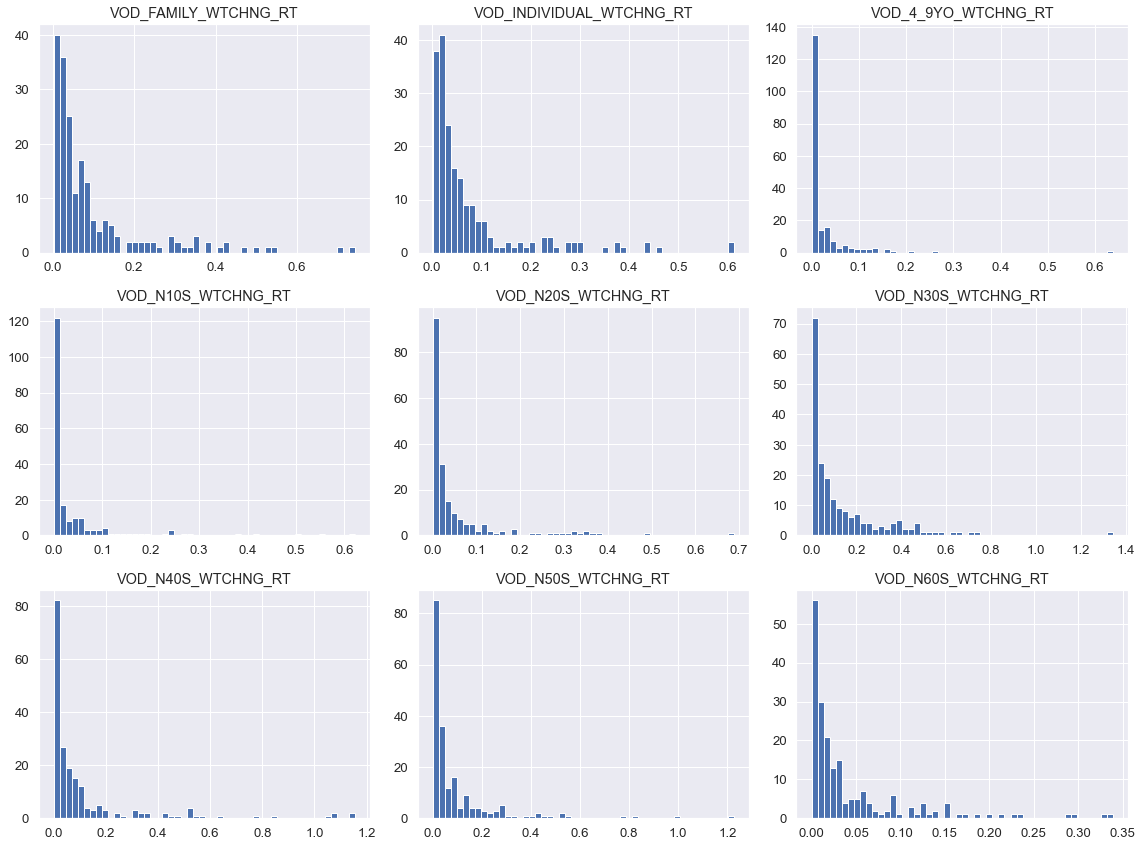

In [426]:
vod_rt.hist(figsize = (16, 12), bins = 50)
plt.tight_layout()
plt.show()